In [1]:
# --- Importation des Bibliothèques ---

# Manipulation des données
import pandas as pd  # Manipulation des données tabulaires
import numpy as np  # Calculs numériques

# Gestion des fichiers et des répertoires
import os  # Interaction avec le système de fichiers
from pathlib import Path  # Gestion des chemins de fichiers
import sys  # Modification du chemin d'import des modules

# Gestion des logs
from loguru import logger  # Gestion des logs enrichis

# Suppression des avertissements inutiles
import warnings  # Ignorer les warnings
warnings.filterwarnings("ignore")

# Résumés statistiques
from skimpy import skim  # Résumés enrichis pour les DataFrames

# Visualisation des données
import matplotlib.pyplot as plt  # Visualisations statiques
import seaborn as sns  # Visualisations statistiques avancées
import plotly.express as px  # Visualisations interactives
import plotly.graph_objects as go  # Graphiques interactifs personnalisés
from plotly.subplots import make_subplots  # Combinaison de plusieurs graphiques interactifs

# Analyse statistique et transformation des données
from scipy.stats import (
    gaussian_kde,  # Estimation de la densité de probabilité
    spearmanr,  # Corrélation de Spearman
    mstats
)
from scipy.stats.mstats import winsorize  # Limitation des outliers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
 
# Réduction de dimensionnalité
from sklearn.decomposition import PCA  # Analyse en Composantes Principales

# Prétraitement et feature engineering
from sklearn.impute import KNNImputer  # Imputation des valeurs manquantes
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, KBinsDiscretizer, OrdinalEncoder, OneHotEncoder, LabelEncoder
)
from sklearn.cluster import KMeans  # Clustering
from sklearn.tree import DecisionTreeRegressor  # Modèle de régression
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Détection de colinéarité



# Configuration des affichages pandas
pd.set_option('display.max_columns', None)  # Afficher toutes les colonnes d'un DataFrame
pd.set_option('display.max_rows', 150)  # Afficher jusqu'à 150 lignes d'un DataFrame
pd.set_option('display.width', 300)  # Éviter les retours à la ligne inutiles

# --- Configuration des Logs ---
# Définir le fichier pour enregistrer les logs avec rotation automatique
logger.add("../logs/analyse.log", rotation="500 MB")
logger.info("=" * 60)
logger.info("Démarrage du notebook")
logger.info("=" * 60)
# --- Définir le répertoire de travail ---
NOTEBOOK_PATH = Path(os.getcwd())  # Chemin actuel
if NOTEBOOK_PATH.name == "notebooks":
    BASE_DIR = NOTEBOOK_PATH.parent
else:
    BASE_DIR = NOTEBOOK_PATH

# Ajouter le répertoire 'src' au chemin Python
sys.path.append(str(BASE_DIR / "src"))

# Définir les répertoires pour les données brutes, nettoyées et les scripts
RAW_DIR = BASE_DIR / "data/raw"
PROCESSED_DIR = BASE_DIR / "data/processed"
SCRIPTS_DIR = BASE_DIR / "scripts"
OUTPUTS_DIR = BASE_DIR / "outputs"


# --- Fonction pour configurer les répertoires ---
def setup_and_log_directories(base_dir, raw_dir, processed_dir, scripts_dir, outputs_dir):
    """
    Configure les répertoires nécessaires au projet.
    Crée les répertoires s'ils n'existent pas et logue leur état.

    Args:
        base_dir (Path): Répertoire racine.
        raw_dir (Path): Répertoire des fichiers bruts.
        processed_dir (Path): Répertoire des fichiers nettoyés.
        scripts_dir (Path): Répertoire des scripts.
        outputs_dir (Path): Répertoire des outputs.

    Returns:
        dict: Dictionnaire contenant les chemins relatifs et absolus.
    """
    try:
        # Définir les chemins relatifs
        base_dir_relative = base_dir.name
        raw_dir_relative = raw_dir.relative_to(base_dir)
        processed_dir_relative = processed_dir.relative_to(base_dir)
        scripts_dir_relative = scripts_dir.relative_to(base_dir)
        outputs_dir_relative = outputs_dir.relative_to(base_dir)
        
        # Loguer le répertoire racine
        logger.info(f"Répertoire racine configuré : {base_dir_relative}")

        # Vérifier et créer les répertoires si nécessaire
        raw_dir.mkdir(parents=True, exist_ok=True)
        logger.info(f"Répertoire des fichiers bruts configuré : {base_dir_relative}\\{raw_dir_relative}")

        processed_dir.mkdir(parents=True, exist_ok=True)
        logger.info(f"Répertoire des fichiers nettoyés configuré : {base_dir_relative}\\{processed_dir_relative}")

        scripts_dir.mkdir(parents=True, exist_ok=True)
        logger.info(f"Répertoire des scripts configuré : {base_dir_relative}\\{scripts_dir_relative}")

        outputs_dir.mkdir(parents=True, exist_ok=True)
        logger.info(f"Répertoire des outputs configuré : {base_dir_relative}\\{outputs_dir_relative}")

        # Retourner les chemins relatifs et absolus
        return {
            "base_dir": base_dir,
            "raw_dir": {"absolute": raw_dir, "relative": raw_dir_relative},
            "processed_dir": {"absolute": processed_dir, "relative": processed_dir_relative},
            "scripts_dir": {"absolute": scripts_dir, "relative": scripts_dir_relative},
            "outputs_dir": {"absolute": outputs_dir, "relative": outputs_dir_relative}
        }

    except Exception as e:
        logger.error(f"Erreur lors de la configuration des répertoires : {e}")
        raise

# Configuration des répertoires
directories = setup_and_log_directories(BASE_DIR, RAW_DIR, PROCESSED_DIR, SCRIPTS_DIR, OUTPUTS_DIR)

logger.info("=" * 60)
logger.info("Répertoires vérifiés et configurés avec succès.")
logger.info("=" * 60)

2025-02-07 16:05:00.618 | INFO     | __main__:<module>:61 - ============================================================
2025-02-07 16:05:00.619 | INFO     | __main__:<module>:62 - Démarrage du notebook
2025-02-07 16:05:00.620 | INFO     | __main__:<module>:63 - ============================================================
2025-02-07 16:05:00.621 | INFO     | __main__:setup_and_log_directories:106 - Répertoire racine configuré : consommation_energie_batiments
2025-02-07 16:05:00.622 | INFO     | __main__:setup_and_log_directories:110 - Répertoire des fichiers bruts configuré : consommation_energie_batiments\data\raw
2025-02-07 16:05:00.623 | INFO     | __main__:setup_and_log_directories:113 - Répertoire des fichiers nettoyés configuré : consommation_energie_batiments\data\processed
2025-02-07 16:05:00.624 | INFO     | __main__:setup_and_log_directories:116 - Répertoire des scripts configuré : consommation_energie_batiments\scripts
2025-02-07 16:05:00.625 | INFO     | __main__:setup_and_

In [2]:
# 🚀 Importation des DataFrames en CSV avec encodage UTF-8
logger.info("=" * 60)
logger.info("Début de l'importation du DataFrame en fichier CSV")
logger.info("-" * 10)

# --- Définir le chemin du fichier à charger ---
file_path = directories["raw_dir"]["absolute"]  # Chemin absolu vers le répertoire contenant les données brutes
dataset_file = file_path / "2016_Building_Energy_Benchmarking.csv"  # Fichier CSV à charger

# --- Vérification de l'existence du fichier ---
if not dataset_file.exists():
    logger.error(f"Le fichier '{dataset_file.name}' est introuvable dans {file_path}.")
    raise FileNotFoundError(f"Fichier non trouvé : {dataset_file}")

try:
    # --- Chargement du fichier CSV ---
    building_consumption = pd.read_csv(dataset_file, encoding="utf-8")
    logger.info(f"✅ Fichier '{dataset_file.name}' chargé avec succès.")
    logger.info(f"📊 Nombre de lignes : {building_consumption.shape[0]} | Nombre de colonnes : {building_consumption.shape[1]}")
except Exception as e:
    logger.error(f"❌ Erreur lors du chargement du fichier : {e}")
    raise
logger.info("-" * 10)
logger.info("Fin de l'importation du DataFrame en fichier CSV")
logger.info("=" * 60)

2025-02-07 16:05:00.643 | INFO     | __main__:<module>:2 - ============================================================
2025-02-07 16:05:00.646 | INFO     | __main__:<module>:3 - Début de l'importation du DataFrame en fichier CSV
2025-02-07 16:05:00.647 | INFO     | __main__:<module>:4 - ----------
2025-02-07 16:05:00.664 | INFO     | __main__:<module>:18 - ✅ Fichier '2016_Building_Energy_Benchmarking.csv' chargé avec succès.
2025-02-07 16:05:00.666 | INFO     | __main__:<module>:19 - 📊 Nombre de lignes : 3376 | Nombre de colonnes : 46
2025-02-07 16:05:00.667 | INFO     | __main__:<module>:23 - ----------
2025-02-07 16:05:00.669 | INFO     | __main__:<module>:24 - Fin de l'importation du DataFrame en fichier CSV
2025-02-07 16:05:00.670 | INFO     | __main__:<module>:25 - ============================================================


In [3]:
# --- Nettoyage des valeurs ---
building_consumption['BuildingType'] = building_consumption['BuildingType'].fillna("Inconnu")

# --- Distribution des types de bâtiments ---
building_type_counts = building_consumption['BuildingType'].value_counts().reset_index()
building_type_counts.columns = ['BuildingType', 'count']

fig_building_type = px.bar(
    building_type_counts,
    x='BuildingType',  
    y='count',          
    title="Distribution des types de bâtiments",
    labels={'BuildingType': 'Type de bâtiment', 'count': 'Nombre de bâtiments'},
    template="plotly_white"
)
fig_building_type.update_traces(marker_color='blue')
fig_building_type.show()

# --- Standardiser les noms de villes ---
building_consumption['City'] = building_consumption['City'].str.strip().str.title()

# --- Distribution des villes ---
city_counts = building_consumption['City'].value_counts().reset_index()
city_counts.columns = ['City', 'count']

fig_city = px.bar(
    city_counts,
    x='City',  
    y='count',  
    title="Distribution des bâtiments par ville",
    labels={'City': 'Ville', 'count': 'Nombre de bâtiments'},
    template="plotly_white"
)
fig_city.update_traces(marker_color='green')
fig_city.show()


In [ ]:
# --- Nettoyage des valeurs de la colonne City ---
building_consumption['City'] = building_consumption['City'].str.strip().str.lower()

# --- Définition des types de bâtiments non résidentiels ---
non_residential_types = [
    'NonResidential',
    'Nonresidential COS',
    'SPS-District K-12',
    'Campus',
    'Nonresidential WA'
]

# --- Dimensions avant filtrage ---
initial_rows = len(building_consumption)

# --- Filtrage du DataFrame ---
building_consumption = building_consumption[
    (building_consumption['BuildingType'].isin(non_residential_types)) &  
    (building_consumption['City'] == 'seattle')  # Vérification insensible à la casse après nettoyage
]

# --- Vérification des types de bâtiments après filtrage ---
unique_building_types = building_consumption['BuildingType'].unique()
logger.info("=" * 60)
logger.info(f"📌 Types de bâtiments présents après filtrage : ")
logger.info(f"{unique_building_types}")

# Afficher les dimensions du dataset après filtrage
logger.info("=" * 60)
logger.info(f"Nombre de lignes : {building_consumption.shape[0]}")
logger.info(f"Nombre de colonnes : {building_consumption.shape[1]}")

# 🔹 Affichage d’un aperçu des données
logger.info("=" * 60)
logger.info("📌 Aperçu des données (échantillon aléatoire) :")
logger.info(f"\n {building_consumption.sample(5)}")
logger.info("=" * 60)


2025-02-07 16:05:02.131 | INFO     | __main__:<module>:24 - ============================================================
2025-02-07 16:05:02.132 | INFO     | __main__:<module>:25 - 📌 Types de bâtiments présents après filtrage : 
2025-02-07 16:05:02.133 | INFO     | __main__:<module>:26 - ['NonResidential' 'Nonresidential COS' 'SPS-District K-12' 'Campus'
 'Nonresidential WA']
2025-02-07 16:05:02.135 | INFO     | __main__:<module>:28 - ============================================================
2025-02-07 16:05:02.136 | INFO     | __main__:<module>:29 - Nombre de lignes : 1668
2025-02-07 16:05:02.137 | INFO     | __main__:<module>:30 - Nombre de colonnes : 46
2025-02-07 16:05:02.137 | INFO     | __main__:<module>:33 - ============================================================
2025-02-07 16:05:02.139 | INFO     | __main__:<module>:34 - 📌 Aperçu des données (échantillon aléatoire) :
2025-02-07 16:05:02.150 | INFO     | __main__:<module>:35 - 
       OSEBuildingID  DataYear    BuildingT

In [5]:
# 🔹 Vérification des types des colonnes
logger.info("=" * 60)
logger.info("📊 Vérification des types des colonnes dans 'building_consumption'")
logger.info("=" * 60)

try:
    # Utilisation directe de df.dtypes pour plus d'efficacité
    column_types = building_consumption.dtypes.to_dict()
    
    for col, dtype in column_types.items():
        unique_types = set(type(x).__name__ for x in building_consumption[col].dropna().unique())   
        logger.info(f"🔹 {col} : {dtype} | Types Python rencontrés : {', '.join(unique_types)}")
    
    logger.info("📋 Inspection des types des colonnes terminée avec succès.")
except Exception as e:
    logger.error(f"❌ Erreur lors de l'inspection des types des colonnes : {e}")
    raise

logger.info("=" * 60)

# 🔍 Détection des colonnes numériques mal encodées en 'object'
wrong_types = building_consumption.select_dtypes(include=['object']).columns

if len(wrong_types) > 0:
    logger.warning(f"⚠️ Colonnes suspectes pouvant contenir des valeurs numériques : {list(wrong_types)}")
    logger.info("-" * 60)
    # Vérification des valeurs uniques pour voir si elles sont mal typées
    for col in wrong_types:
        unique_values = building_consumption[col].unique()
        num_unique_values = len(unique_values)
        logger.info(f"🔹 {col} - {num_unique_values} valeurs uniques. Exemples : {unique_values[:5]} ...")
else:
    logger.info("✅ Aucune colonne suspecte trouvée parmi les types 'object'.")


2025-02-07 16:05:02.173 | INFO     | __main__:<module>:2 - ============================================================
2025-02-07 16:05:02.174 | INFO     | __main__:<module>:3 - 📊 Vérification des types des colonnes dans 'building_consumption'
2025-02-07 16:05:02.176 | INFO     | __main__:<module>:4 - ============================================================
2025-02-07 16:05:02.179 | INFO     | __main__:<module>:12 - 🔹 OSEBuildingID : int64 | Types Python rencontrés : int64
2025-02-07 16:05:02.181 | INFO     | __main__:<module>:12 - 🔹 DataYear : int64 | Types Python rencontrés : int64
2025-02-07 16:05:02.183 | INFO     | __main__:<module>:12 - 🔹 BuildingType : object | Types Python rencontrés : str
2025-02-07 16:05:02.184 | INFO     | __main__:<module>:12 - 🔹 PrimaryPropertyType : object | Types Python rencontrés : str
2025-02-07 16:05:02.186 | INFO     | __main__:<module>:12 - 🔹 PropertyName : object | Types Python rencontrés : str
2025-02-07 16:05:02.189 | INFO     | __main__:<mo

In [6]:
# Détection des valeurs aberrantes pour les variables numériques
numeric_columns = building_consumption.select_dtypes(include=[np.number]).columns
outliers = {}
for col in numeric_columns:
    q1 = building_consumption[col].quantile(0.25)
    q3 = building_consumption[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outlier_count = ((building_consumption[col] < lower_bound) | (building_consumption[col] > upper_bound)).sum()
    if outlier_count > 0:
        outliers[col] = outlier_count
logger.info("=" * 60)
logger.info("🔍 Valeurs aberrantes détectées :")
logger.info("=" * 60)
for col, count in outliers.items():
    logger.info(f"📌 {col} : {count} valeurs aberrantes détectées")

# Vérification des erreurs typographiques pour les variables catégoriques
categorical_columns = building_consumption.select_dtypes(include=['object']).columns
for col in categorical_columns:
    unique_values = building_consumption[col].nunique()
    logger.info(f"🔤 {col} contient {unique_values} valeurs uniques")
    if unique_values < 10:  # Seuil arbitraire pour l'affichage
        logger.info(f"Valeurs uniques dans {col} : {building_consumption[col].unique()}")

2025-02-07 16:05:02.284 | INFO     | __main__:<module>:13 - ============================================================
2025-02-07 16:05:02.286 | INFO     | __main__:<module>:14 - 🔍 Valeurs aberrantes détectées :
2025-02-07 16:05:02.288 | INFO     | __main__:<module>:15 - ============================================================
2025-02-07 16:05:02.289 | INFO     | __main__:<module>:17 - 📌 ZipCode : 51 valeurs aberrantes détectées
2025-02-07 16:05:02.290 | INFO     | __main__:<module>:17 - 📌 Longitude : 199 valeurs aberrantes détectées
2025-02-07 16:05:02.291 | INFO     | __main__:<module>:17 - 📌 NumberofBuildings : 105 valeurs aberrantes détectées
2025-02-07 16:05:02.292 | INFO     | __main__:<module>:17 - 📌 NumberofFloors : 138 valeurs aberrantes détectées
2025-02-07 16:05:02.293 | INFO     | __main__:<module>:17 - 📌 PropertyGFATotal : 203 valeurs aberrantes détectées
2025-02-07 16:05:02.294 | INFO     | __main__:<module>:17 - 📌 PropertyGFAParking : 333 valeurs aberrantes détecté

In [7]:
# 🔹 Suppression des colonnes ayant une seule valeur unique
logger.info("=" * 60)
logger.info("🚀 Suppression des colonnes inutiles")
logger.info("=" * 60)

# Détection des colonnes ayant une seule valeur unique (toutes catégories)
unique_value_columns = [col for col in building_consumption.columns if building_consumption[col].nunique() == 1]

if unique_value_columns:
    logger.info(f"📌 Suppression des colonnes avec une seule valeur unique : {unique_value_columns}")
    building_consumption.drop(columns=unique_value_columns, inplace=True)
    logger.info(f"✅ {len(unique_value_columns)} colonnes supprimées.")
else:
    logger.info("✅ Aucune colonne avec une seule valeur unique trouvée.")

logger.info("-" * 20)

# 🔹 Suppression des colonnes non analytiques
columns_to_remove = ['PropertyName', 'Address', 'TaxParcelIdentificationNumber']

# Vérifier quelles colonnes existent avant suppression
existing_columns = [col for col in columns_to_remove if col in building_consumption.columns]

if existing_columns:
    logger.info(f"📌 Suppression des colonnes sans valeur analytique : {existing_columns}")
    building_consumption.drop(columns=existing_columns, inplace=True, errors='ignore')
    logger.info(f"✅ {len(existing_columns)} colonnes supprimées.")
else:
    logger.warning("⚠️ Aucune colonne trouvée parmi celles à supprimer.")

logger.info("=" * 60)

# 🔹 Générer un résumé statistique des variables numériques
logger.info("📊 Résumé statistique des variables numériques")
logger.info("=" * 60)

# Limiter l'affichage pour éviter un log trop long
numeric_summary = building_consumption.describe().T[['mean', 'min', 'max']]
if len(numeric_summary) > 10:
    logger.info(f"\n {numeric_summary.head(10)} ... (Affichage limité à 10 colonnes)")
else:
    logger.info(f"\n {numeric_summary}")

logger.info("=" * 60)

# 🔹 Générer un résumé statistique des variables catégoriques
logger.info("🔤 Résumé statistique des variables catégoriques")
logger.info("=" * 60)

categorical_summary = building_consumption.describe(include=['object'])

if len(categorical_summary) > 10:
    logger.info(f"\n {categorical_summary.head(10)} ... (Affichage limité à 10 catégories)")
else:
    logger.info(f"\n {categorical_summary}")

logger.info("=" * 60)


2025-02-07 16:05:02.342 | INFO     | __main__:<module>:2 - ============================================================
2025-02-07 16:05:02.343 | INFO     | __main__:<module>:3 - 🚀 Suppression des colonnes inutiles
2025-02-07 16:05:02.344 | INFO     | __main__:<module>:4 - ============================================================
2025-02-07 16:05:02.348 | INFO     | __main__:<module>:10 - 📌 Suppression des colonnes avec une seule valeur unique : ['DataYear', 'City', 'State']
2025-02-07 16:05:02.350 | INFO     | __main__:<module>:12 - ✅ 3 colonnes supprimées.
2025-02-07 16:05:02.351 | INFO     | __main__:<module>:16 - --------------------
2025-02-07 16:05:02.352 | INFO     | __main__:<module>:25 - 📌 Suppression des colonnes sans valeur analytique : ['PropertyName', 'Address', 'TaxParcelIdentificationNumber']
2025-02-07 16:05:02.353 | INFO     | __main__:<module>:27 - ✅ 3 colonnes supprimées.
2025-02-07 16:05:02.354 | INFO     | __main__:<module>:31 - =================================

In [8]:
# 🚀 Harmonisation des noms du DataFrame
logger.info("=" * 60)
logger.info("🚀 Début de l'harmonisation des noms des colonnes du DataFrame")
logger.info("=" * 60)

# 🔹 Définition du mapping des nouveaux noms de colonnes
columns_mapping = {
    # Identification et localisation
    "OSEBuildingID": "building_id",
    "DataYear": "year",
    "BuildingType": "building_type",
    "PrimaryPropertyType": "property_type",
    "PropertyName": "property_name",
    "Address": "address",
    "City": "city",
    "State": "state",
    "ZipCode": "zip_code",
    "TaxParcelIdentificationNumber": "tax_parcel_id",
    "CouncilDistrictCode": "council_district",
    "Neighborhood": "neighborhood",
    "Latitude": "latitude",
    "Longitude": "longitude",
    # Caractéristiques des bâtiments
    "YearBuilt": "year_built",
    "NumberofBuildings": "num_buildings",
    "NumberofFloors": "num_floors",
    "PropertyGFATotal": "gfa_total",
    "PropertyGFAParking": "gfa_parking",
    "PropertyGFABuilding(s)": "gfa_buildings",
    "ListOfAllPropertyUseTypes": "property_use_list",
    "LargestPropertyUseType": "largest_use_type",
    "LargestPropertyUseTypeGFA": "largest_use_gfa",
    "SecondLargestPropertyUseType": "second_largest_use",
    "SecondLargestPropertyUseTypeGFA": "second_largest_gfa",
    "ThirdLargestPropertyUseType": "third_largest_use",
    "ThirdLargestPropertyUseTypeGFA": "third_largest_gfa",
    # Certifications et scores énergétiques
    "YearsENERGYSTARCertified": "energy_star_years",
    "ENERGYSTARScore": "energy_star_score",
    # Consommation énergétique
    "SiteEUI(kBtu/sf)": "site_eui",
    "SiteEUIWN(kBtu/sf)": "site_eui_wn",
    "SourceEUI(kBtu/sf)": "source_eui",
    "SourceEUIWN(kBtu/sf)": "source_eui_wn",
    "SiteEnergyUse(kBtu)": "site_energy_use",
    "SiteEnergyUseWN(kBtu)": "site_energy_use_wn",
    "SteamUse(kBtu)": "steam_use",
    "Electricity(kWh)": "electricity_kwh",
    "Electricity(kBtu)": "electricity_kbtu",
    "NaturalGas(therms)": "natural_gas_therms",
    "NaturalGas(kBtu)": "natural_gas_kbtu",
    # Divers
    "DefaultData": "default_data",
    "Comments": "comments",
    "ComplianceStatus": "compliance_status",
    "Outlier": "outlier",
    # Émissions de gaz à effet de serre
    "TotalGHGEmissions": "ghg_emissions_total",
    "GHGEmissionsIntensity": "ghg_emissions_intensity"
}

# 🔹 Vérification et application du renommage
if building_consumption is not None:
    logger.info("-" * 20)
    logger.info("🚀 Renommage des colonnes du DataFrame 'building_consumption'...")
    logger.info("-" * 20)

    # Vérification des colonnes existantes avant renommage
    existing_columns = {col: new_col for col, new_col in columns_mapping.items() if col in building_consumption.columns}

    # Application du renommage sécurisé
    building_consumption = building_consumption.rename(columns=existing_columns)

    # 🔹 Affichage des colonnes renommées par groupes pour une meilleure lisibilité
    renamed_columns = list(building_consumption.columns)
    max_columns_per_line = 10  # Nombre de colonnes par ligne dans les logs
    formatted_columns = [
        renamed_columns[i:i + max_columns_per_line]
        for i in range(0, len(renamed_columns), max_columns_per_line)
    ]

    logger.info("✅ Colonnes renommées avec succès :")
    for line in formatted_columns:
        logger.info(", ".join(line))

else:
    logger.warning("⚠️ Le DataFrame 'building_consumption' est introuvable.")

logger.info("=" * 60)

# 🔹 Vérification : Aperçu du DataFrame après renommage
logger.info("🔍 Aperçu du DataFrame après renommage :")
logger.info("=" * 60)

# Utiliser `.sample(5)` au lieu de `.head()` pour un aperçu plus varié
if len(building_consumption) >= 5:
    sample_data = building_consumption.sample(5)
else:
    sample_data = building_consumption

logger.info(f"\n {sample_data}")
logger.info("=" * 60)


2025-02-07 16:05:02.412 | INFO     | __main__:<module>:2 - ============================================================
2025-02-07 16:05:02.414 | INFO     | __main__:<module>:3 - 🚀 Début de l'harmonisation des noms des colonnes du DataFrame
2025-02-07 16:05:02.414 | INFO     | __main__:<module>:4 - ============================================================
2025-02-07 16:05:02.415 | INFO     | __main__:<module>:64 - --------------------
2025-02-07 16:05:02.416 | INFO     | __main__:<module>:65 - 🚀 Renommage des colonnes du DataFrame 'building_consumption'...
2025-02-07 16:05:02.417 | INFO     | __main__:<module>:66 - --------------------
2025-02-07 16:05:02.419 | INFO     | __main__:<module>:82 - ✅ Colonnes renommées avec succès :
2025-02-07 16:05:02.419 | INFO     | __main__:<module>:84 - building_id, building_type, property_type, zip_code, council_district, neighborhood, latitude, longitude, year_built, num_buildings
2025-02-07 16:05:02.420 | INFO     | __main__:<module>:84 - num_fl

In [9]:
# === Étude des Doublons ===
logger.info("=" * 60)
logger.info("🔍 Analyse des Doublons")
logger.info("=" * 60)

# 🔹 Détection des doublons
duplicate_rows = building_consumption.duplicated()  # Détection globale des doublons
total_duplicates = duplicate_rows.sum()  # Nombre total de doublons

logger.info(f"📌 Nombre total de doublons : {total_duplicates}")

# 🔹 Affichage des doublons détectés (si présents)
if total_duplicates > 0:
    logger.warning("⚠️ Des doublons ont été détectés dans le DataFrame.")

    # Affichage aléatoire des doublons si > 5
    duplicate_sample = building_consumption[duplicate_rows].sample(min(5, total_duplicates))
    logger.info(f"Aperçu des doublons :\n{duplicate_sample}")

else:
    logger.info("✅ Aucun doublon détecté dans le DataFrame.")

# 🔹 Suppression des doublons
if total_duplicates > 0:
    # Suppression des doublons avec mise à jour en place
    building_consumption.drop_duplicates(inplace=True)
    logger.info(f"✅ Doublons supprimés. Nombre de lignes après nettoyage : {building_consumption.shape[0]}")
else:
    logger.info("Aucune suppression de doublons nécessaire.")

# 🔹 Résumé final
logger.info("=" * 60)
logger.info(f"📊 Nombre de lignes finales : {building_consumption.shape[0]}")
logger.info(f"📊 Nombre de colonnes finales : {building_consumption.shape[1]}")
logger.info("=" * 60)


2025-02-07 16:05:02.440 | INFO     | __main__:<module>:2 - ============================================================
2025-02-07 16:05:02.440 | INFO     | __main__:<module>:3 - 🔍 Analyse des Doublons
2025-02-07 16:05:02.441 | INFO     | __main__:<module>:4 - ============================================================
2025-02-07 16:05:02.446 | INFO     | __main__:<module>:10 - 📌 Nombre total de doublons : 0
2025-02-07 16:05:02.448 | INFO     | __main__:<module>:21 - ✅ Aucun doublon détecté dans le DataFrame.
2025-02-07 16:05:02.450 | INFO     | __main__:<module>:29 - Aucune suppression de doublons nécessaire.
2025-02-07 16:05:02.451 | INFO     | __main__:<module>:32 - ============================================================
2025-02-07 16:05:02.452 | INFO     | __main__:<module>:33 - 📊 Nombre de lignes finales : 1668
2025-02-07 16:05:02.454 | INFO     | __main__:<module>:34 - 📊 Nombre de colonnes finales : 40
2025-02-07 16:05:02.455 | INFO     | __main__:<module>:35 - ============

### **🔍 Début de la phase de préparation des prédictions**
Nous allons maintenant **préparer les données pour la prédiction** des **émissions de CO₂** (`ghg_emissions_total`) et de la **consommation totale d’énergie** (`site_energy_use`).  

---

### **📌 Contexte**
Les mesures de consommation d’énergie et d’émissions de CO₂ sont coûteuses à obtenir. L’objectif est donc de construire un **modèle de prédiction** en s’appuyant sur les caractéristiques structurelles des bâtiments (**taille, usage, date de construction, situation géographique, etc.**).  

Avant de passer à la préparation des données pour la modélisation, nous allons **vérifier la relation entre ces deux variables cibles** et explorer leur **corrélation**.  

---

### **🔍 Analyse de la corrélation entre la consommation d’énergie et les émissions de CO₂**
 

2025-02-07 16:05:02.467 | INFO     | __main__:<module>:1 - ================================================================================
2025-02-07 16:05:02.469 | INFO     | __main__:<module>:2 - 🔍 Analyse de la corrélation entre 'site_energy_use' et 'ghg_emissions_total'
2025-02-07 16:05:02.471 | INFO     | __main__:<module>:3 - ================================================================================
2025-02-07 16:05:02.507 | INFO     | __main__:<module>:11 - 📈 Corrélation : 0.86


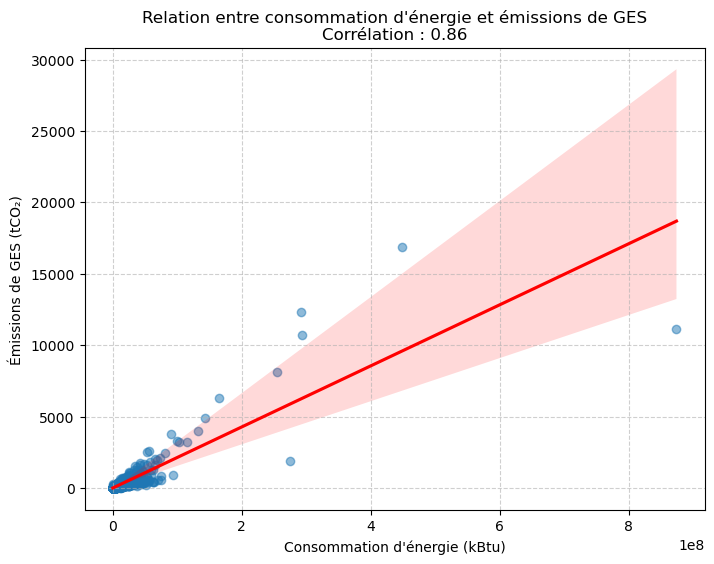

2025-02-07 16:05:02.685 | INFO     | __main__:<module>:27 - ✅ Graphique affiché avec succès.
2025-02-07 16:05:02.719 | INFO     | __main__:<module>:31 - ================================================================================


In [10]:
logger.info("=" * 80)
logger.info("🔍 Analyse de la corrélation entre 'site_energy_use' et 'ghg_emissions_total'")
logger.info("=" * 80)


# Vérification de la présence des variables cibles
if all(col in building_consumption.columns for col in ["site_energy_use", "ghg_emissions_total"]):
    
    # Calcul de la corrélation
    corr_value = building_consumption["site_energy_use"].corr(building_consumption["ghg_emissions_total"])
    logger.info(f"📈 Corrélation : {corr_value:.2f}")

    # 📊 Affichage du scatterplot
    plt.figure(figsize=(8, 6))
    sns.regplot(x="site_energy_use", 
                y="ghg_emissions_total", 
                data=building_consumption, 
                scatter_kws={"alpha": 0.5}, 
                line_kws={"color": "red"})
    
    plt.xlabel("Consommation d'énergie (kBtu)")
    plt.ylabel("Émissions de GES (tCO₂)")
    plt.title(f"Relation entre consommation d'énergie et émissions de GES\nCorrélation : {corr_value:.2f}", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

    logger.info("✅ Graphique affiché avec succès.")

else:
    logger.error("❌ Une des variables cibles est absente du dataset.")
logger.info("=" * 80)



### 📌 **Interprétation des résultats**
> La corrélation entre la consommation d'énergie (`site_energy_use`) et les émissions de GES (`ghg_emissions_total`) est **très forte** (**0.86**).  
> Cela signifie que ces deux variables évoluent **de manière similaire** :  
> - Un bâtiment consommant plus d'énergie aura généralement **des émissions de GES plus élevées**.  
> - Toute transformation ou modification de variables basée sur l'une de ces cibles **aura des effets comparables sur l'autre**.  


### **🔍 Analyse et correction du code : Étude des corrélations avec les variables cibles**
Nous allons maintenant analyser la **corrélation entre les variables explicatives et les cibles** (`site_energy_use` et `ghg_emissions_total`).

### **📌 Objectifs de cette étape**
✅ **Vérifier la présence des variables cibles dans le dataset.**  
✅ **Sélectionner uniquement les variables numériques pour le calcul des corrélations.**  
✅ **Calculer et trier la matrice de corrélation.**  
✅ **Visualiser la heatmap des corrélations pour mieux comprendre les liens entre les variables.**  



2025-02-07 16:05:02.729 | INFO     | __main__:<module>:2 - ================================================================================
2025-02-07 16:05:02.730 | INFO     | __main__:<module>:3 - 🔍 Analyse des corrélations entre les variables et les cibles ('site_energy_use' & 'ghg_emissions_total')
2025-02-07 16:05:02.731 | INFO     | __main__:<module>:4 - ================================================================================
2025-02-07 16:05:02.732 | INFO     | __main__:<module>:14 - ✅ Les variables cibles sont présentes dans le dataset.
2025-02-07 16:05:02.733 | INFO     | __main__:<module>:17 - 📊 Sélection des variables numériques...
2025-02-07 16:05:02.735 | INFO     | __main__:<module>:20 - 🔢 Nombre de variables numériques sélectionnées : 29
2025-02-07 16:05:02.736 | INFO     | __main__:<module>:23 - 🧮 Calcul de la matrice de corrélation...
2025-02-07 16:05:02.739 | INFO     | __main__:<module>:27 - 📉 Extraction des corrélations avec les variables cibles...
2025-02-0

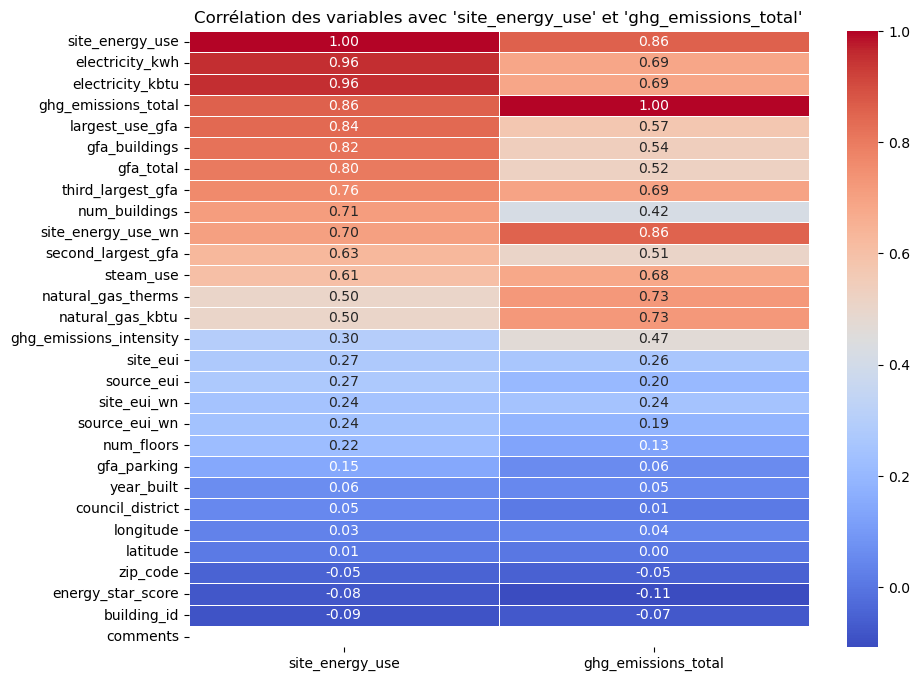

2025-02-07 16:05:02.975 | INFO     | __main__:<module>:40 - ✅ Heatmap affichée avec succès.
2025-02-07 16:05:02.976 | INFO     | __main__:<module>:41 - ================================================================================


In [11]:
# === Étude des corrélations avec les cibles ===
logger.info("=" * 80)
logger.info("🔍 Analyse des corrélations entre les variables et les cibles ('site_energy_use' & 'ghg_emissions_total')")
logger.info("=" * 80)

# Vérifier que les variables cibles existent dans le dataset
target_cols = ["site_energy_use", "ghg_emissions_total"]
missing_targets = [col for col in target_cols if col not in building_consumption.columns]

if missing_targets:
    logger.error(f"❌ Les variables cibles suivantes sont absentes du dataset : {missing_targets}")
    raise ValueError(f"Les variables cibles suivantes sont absentes du dataset : {missing_targets}")

logger.info("✅ Les variables cibles sont présentes dans le dataset.")

# Sélectionner uniquement les variables numériques
logger.info("📊 Sélection des variables numériques...")
numeric_features = building_consumption.select_dtypes(include=['number'])

logger.info(f"🔢 Nombre de variables numériques sélectionnées : {numeric_features.shape[1]}")

# Calculer la matrice de corrélation
logger.info("🧮 Calcul de la matrice de corrélation...")
correlation_matrix = numeric_features.corr()

# Extraire uniquement les corrélations des deux cibles et trier correctement
logger.info("📉 Extraction des corrélations avec les variables cibles...")
target_correlation = correlation_matrix[target_cols].sort_values(by="site_energy_use", ascending=False)

logger.info("✅ Matrice de corrélation extraite et triée.")

# Afficher la heatmap des corrélations pour visualiser les différences
logger.info("📊 Affichage de la heatmap des corrélations...")

plt.figure(figsize=(10, 8))
sns.heatmap(target_correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corrélation des variables avec 'site_energy_use' et 'ghg_emissions_total'")
plt.show()

logger.info("✅ Heatmap affichée avec succès.")
logger.info("=" * 80)

In [12]:
logger.info("=" * 80)
logger.info("🔍 Analyse et suppression des colonnes inutiles")
logger.info("=" * 80)

# 🔹 Définition des colonnes à analyser
low_corr_cols = ["CouncilDistrictCode", "longitude", "latitude", "zip_code", "building_id", "comments"]
redundant_cols = ["electricity_kwh)", "natural_gas_therms", "site_energy_use_wn"]
binary_cols_unbalanced = ["default_data"]  # Très déséquilibré (ex: 96.6% False, 3.3% True)
single_value_cols = [col for col in building_consumption.columns if building_consumption[col].nunique() == 1]

logger.info("🔍 Vérification des corrélations des colonnes faiblement corrélées")
for col in low_corr_cols:
    if col in building_consumption.columns:
        corr_site = building_consumption[col].corr(building_consumption["site_energy_use"])
        corr_ghg = building_consumption[col].corr(building_consumption["ghg_emissions_total"])
        logger.info(f"📉 {col} - Corrélation avec 'site_energy_use' : {corr_site:.2f}, avec 'ghg_emissions_total' : {corr_ghg:.2f}")

# 🔄 Suppression des colonnes faiblement corrélées
logger.info(f"🔄 Suppression des colonnes faiblement corrélées : {low_corr_cols}")
building_consumption.drop(columns=low_corr_cols, inplace=True, errors='ignore')
logger.info(f"✅ Colonnes faiblement corrélées supprimées. Nouveau nombre de colonnes : {building_consumption.shape[1]}")
logger.info("=" * 60)

# 🔹 Vérification avant suppression des colonnes redondantes
logger.info("🔍 Vérification des colonnes redondantes")
for col in redundant_cols:
    if col in building_consumption.columns:
        equivalent_col = col.replace("kWh", "kBtu").replace("therms", "kBtu")
        if equivalent_col in building_consumption.columns:
            corr_equivalence = building_consumption[col].corr(building_consumption[equivalent_col])
            logger.info(f"🔄 {col} vs {equivalent_col} - Corrélation : {corr_equivalence:.2f}")

# 🔄 Suppression des colonnes redondantes
logger.info(f"🔄 Suppression des colonnes redondantes : {redundant_cols}")
building_consumption.drop(columns=redundant_cols, inplace=True, errors='ignore')
logger.info(f"✅ Colonnes redondantes supprimées. Nouveau nombre de colonnes : {building_consumption.shape[1]}")
logger.info("=" * 60)

# 🔹 Suppression des colonnes binaires très déséquilibrées
logger.info("🔍 Vérification et suppression des colonnes binaires déséquilibrées")
for col in binary_cols_unbalanced:
    if col in building_consumption.columns:
        value_counts = building_consumption[col].value_counts(normalize=True)
        logger.info(f"🔄 {col} - Répartition des valeurs : {value_counts.to_dict()}")

logger.info(f"🔄 Suppression des colonnes binaires déséquilibrées : {binary_cols_unbalanced}")
building_consumption.drop(columns=binary_cols_unbalanced, inplace=True, errors='ignore')
logger.info(f"✅ Colonnes binaires déséquilibrées supprimées. Nouveau nombre de colonnes : {building_consumption.shape[1]}")
logger.info("=" * 60)

# 🔹 Suppression des colonnes avec une seule valeur unique
logger.info("🔍 Suppression des colonnes contenant une seule valeur unique")
if single_value_cols:
    logger.info(f"🔄 Colonnes contenant une seule valeur unique : {single_value_cols}")
    building_consumption.drop(columns=single_value_cols, inplace=True, errors='ignore')
    logger.info(f"✅ Colonnes avec une seule valeur unique supprimées. Nouveau nombre de colonnes : {building_consumption.shape[1]}")
else:
    logger.info("✅ Aucune colonne avec une seule valeur unique détectée.")
logger.info("=" * 80)


2025-02-07 16:05:02.987 | INFO     | __main__:<module>:1 - ================================================================================
2025-02-07 16:05:02.988 | INFO     | __main__:<module>:2 - 🔍 Analyse et suppression des colonnes inutiles
2025-02-07 16:05:02.989 | INFO     | __main__:<module>:3 - ================================================================================
2025-02-07 16:05:02.993 | INFO     | __main__:<module>:11 - 🔍 Vérification des corrélations des colonnes faiblement corrélées
2025-02-07 16:05:02.995 | INFO     | __main__:<module>:16 - 📉 longitude - Corrélation avec 'site_energy_use' : 0.03, avec 'ghg_emissions_total' : 0.04
2025-02-07 16:05:02.996 | INFO     | __main__:<module>:16 - 📉 latitude - Corrélation avec 'site_energy_use' : 0.01, avec 'ghg_emissions_total' : 0.00
2025-02-07 16:05:02.998 | INFO     | __main__:<module>:16 - 📉 zip_code - Corrélation avec 'site_energy_use' : -0.05, avec 'ghg_emissions_total' : -0.05
2025-02-07 16:05:02.999 | INFO     

In [13]:
logger.info("=" * 80)
logger.info("🔍 Analyse et Nettoyage des Valeurs Manquantes")
logger.info("=" * 80)

# 🔹 Calcul des valeurs manquantes
missing_values = building_consumption.isnull().sum()
missing_percent = (missing_values / len(building_consumption)) * 100

# 🔹 Création d'un DataFrame résumant les valeurs manquantes
missing_summary = pd.DataFrame({
    'Colonnes': building_consumption.columns,
    'Total Manquantes': missing_values,
    'Pourcentage Manquantes (%)': missing_percent
})

# 🔹 Détection des colonnes ayant plus de 30% de valeurs manquantes
threshold = 30  # Seuil en pourcentage
cols_to_drop = missing_summary[missing_summary['Pourcentage Manquantes (%)'] > threshold]['Colonnes'].tolist()

# 🔹 Coloration des colonnes pour le graphique
missing_summary['Color'] = missing_summary['Colonnes'].apply(
    lambda col: 'red' if col in cols_to_drop else 'blue'
)

# 🔹 Filtrer les colonnes avec des valeurs manquantes pour la visualisation
missing_data_filtered = missing_summary[missing_summary['Total Manquantes'] > 0]

# 🔹 Affichage des premières colonnes les plus impactées
top_missing = missing_summary.sort_values(by='Pourcentage Manquantes (%)', ascending=False).head(5)
logger.info("📉 Top 5 des colonnes avec le plus de valeurs manquantes :")
for index, row in top_missing.iterrows():
    logger.info(f"🔹 {row['Colonnes']} : {row['Pourcentage Manquantes (%)']:.2f}% ({row['Total Manquantes']} valeurs)")

# 🔹 Visualisation des valeurs manquantes
if not missing_data_filtered.empty:
    logger.info("📊 Affichage du graphique des valeurs manquantes...")
    
    fig = px.bar(
        missing_data_filtered,
        x='Colonnes',
        y='Pourcentage Manquantes (%)',
        color='Color',
        title="Pourcentage de valeurs manquantes",
        labels={'Pourcentage Manquantes (%)': '% Manquant', 'Colonnes': 'Colonnes'},
        text='Pourcentage Manquantes (%)',
        color_discrete_map={'red': 'red', 'blue': 'blue'}
    )
    fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
    fig.update_layout(
        plot_bgcolor='white',
        xaxis=dict(
            title="Colonnes",
            tickangle=45,
            categoryorder='array',
            categoryarray=missing_data_filtered['Colonnes']
        ),
        yaxis=dict(title="% de valeurs manquantes"),
        width=2000,
        height=600
    )
    fig.show()
else:
    logger.info("✅ Aucune valeur manquante à visualiser.")

logger.info("=" * 80)

# 🔹 Affichage des colonnes à supprimer
logger.info(f"{len(cols_to_drop)} colonnes ont plus de {threshold}% de valeurs manquantes.")
if cols_to_drop:
    max_columns_per_line = 8
    for i in range(0, len(cols_to_drop), max_columns_per_line):
        logger.info(", ".join(cols_to_drop[i:i + max_columns_per_line]))
else:
    logger.info("✅ Aucune colonne n'a plus de 30% de valeurs manquantes.")

logger.info("=" * 80)


2025-02-07 16:05:03.031 | INFO     | __main__:<module>:1 - ================================================================================
2025-02-07 16:05:03.033 | INFO     | __main__:<module>:2 - 🔍 Analyse et Nettoyage des Valeurs Manquantes
2025-02-07 16:05:03.035 | INFO     | __main__:<module>:3 - ================================================================================
2025-02-07 16:05:03.042 | INFO     | __main__:<module>:30 - 📉 Top 5 des colonnes avec le plus de valeurs manquantes :
2025-02-07 16:05:03.044 | INFO     | __main__:<module>:32 - 🔹 outlier : 98.98% (1651 valeurs)
2025-02-07 16:05:03.046 | INFO     | __main__:<module>:32 - 🔹 energy_star_years : 94.12% (1570 valeurs)
2025-02-07 16:05:03.048 | INFO     | __main__:<module>:32 - 🔹 third_largest_gfa : 78.84% (1315 valeurs)
2025-02-07 16:05:03.050 | INFO     | __main__:<module>:32 - 🔹 third_largest_use : 78.84% (1315 valeurs)
2025-02-07 16:05:03.052 | INFO     | __main__:<module>:32 - 🔹 second_largest_use : 48.74% (

2025-02-07 16:05:03.106 | INFO     | __main__:<module>:65 - ================================================================================
2025-02-07 16:05:03.107 | INFO     | __main__:<module>:68 - 7 colonnes ont plus de 30% de valeurs manquantes.
2025-02-07 16:05:03.108 | INFO     | __main__:<module>:72 - second_largest_use, second_largest_gfa, third_largest_use, third_largest_gfa, energy_star_years, energy_star_score, outlier
2025-02-07 16:05:03.109 | INFO     | __main__:<module>:76 - ================================================================================


In [14]:
logger.info("=" * 60)
logger.info("🔍 Suppression des colonnes ayant plus de 30% de valeurs manquantes")
logger.info("=" * 60)

# Vérifier les colonnes existantes avant suppression
cols_to_drop_existing = [col for col in cols_to_drop if col in building_consumption.columns]

if cols_to_drop_existing:
    logger.info(f"📌 Suppression de {len(cols_to_drop_existing)} colonnes dépassant {threshold}% de valeurs manquantes.")
    logger.info(f"🔹 Colonnes supprimées (Top 5) : {cols_to_drop_existing[:5]}{'...' if len(cols_to_drop_existing) > 5 else ''}")

    # Suppression des colonnes (modification directe avec inplace=True)
    building_consumption.drop(columns=cols_to_drop_existing, inplace=True)

    logger.info(f"✅ Suppression effectuée. Nouveau nombre de colonnes : {building_consumption.shape[1]}")
    logger.info(f"✅ Nombre de lignes restantes : {building_consumption.shape[0]}")
else:
    logger.info("✅ Aucune colonne supprimée (aucune ne dépasse le seuil de valeurs manquantes).")

logger.info("=" * 60)


2025-02-07 16:05:03.117 | INFO     | __main__:<module>:1 - ============================================================
2025-02-07 16:05:03.119 | INFO     | __main__:<module>:2 - 🔍 Suppression des colonnes ayant plus de 30% de valeurs manquantes
2025-02-07 16:05:03.120 | INFO     | __main__:<module>:3 - ============================================================
2025-02-07 16:05:03.121 | INFO     | __main__:<module>:9 - 📌 Suppression de 7 colonnes dépassant 30% de valeurs manquantes.
2025-02-07 16:05:03.121 | INFO     | __main__:<module>:10 - 🔹 Colonnes supprimées (Top 5) : ['second_largest_use', 'second_largest_gfa', 'third_largest_use', 'third_largest_gfa', 'energy_star_years']...
2025-02-07 16:05:03.123 | INFO     | __main__:<module>:15 - ✅ Suppression effectuée. Nouveau nombre de colonnes : 25
2025-02-07 16:05:03.124 | INFO     | __main__:<module>:16 - ✅ Nombre de lignes restantes : 1668
2025-02-07 16:05:03.125 | INFO     | __main__:<module>:20 - ==================================

In [15]:
logger.info("=" * 60)
logger.info("🔍 Début de l'imputation des valeurs manquantes")
logger.info("=" * 60)

# =====================================================
# 📊 1️⃣ Vérification initiale des valeurs manquantes
# =====================================================

# Recalcul des valeurs manquantes après suppression des colonnes
missing_values = building_consumption.isnull().sum()
missing_percent = (missing_values / len(building_consumption)) * 100

# Filtrer les colonnes ayant encore des valeurs manquantes
missing_summary_remaining = pd.DataFrame({
    'Colonnes': building_consumption.columns,
    'Total Manquantes': missing_values,
    'Pourcentage Manquantes (%)': missing_percent
}).query("`Total Manquantes` > 0")
logger.info("-" * 30)
logger.info("🔍 Colonnes ayant encore des valeurs manquantes après suppression :")
logger.info("-" * 30)
logger.info(f"\n {missing_summary_remaining}")
logger.info("=" * 60)


2025-02-07 16:05:03.134 | INFO     | __main__:<module>:1 - ============================================================
2025-02-07 16:05:03.135 | INFO     | __main__:<module>:2 - 🔍 Début de l'imputation des valeurs manquantes
2025-02-07 16:05:03.136 | INFO     | __main__:<module>:3 - ============================================================
2025-02-07 16:05:03.140 | INFO     | __main__:<module>:19 - ------------------------------
2025-02-07 16:05:03.141 | INFO     | __main__:<module>:20 - 🔍 Colonnes ayant encore des valeurs manquantes après suppression :
2025-02-07 16:05:03.142 | INFO     | __main__:<module>:21 - ------------------------------
2025-02-07 16:05:03.144 | INFO     | __main__:<module>:22 - 
                                         Colonnes  Total Manquantes  Pourcentage Manquantes (%)
num_buildings                      num_buildings                 2                    0.119904
property_use_list              property_use_list                 2                    0.11990

In [16]:
logger.info("=" * 60)
logger.info("🔍 Début de l'imputation des valeurs manquantes")
logger.info("=" * 60)

# =====================================================
# 📊 1️⃣ Imputation des valeurs manquantes pour les variables numériques
# =====================================================
logger.info("📌 Imputation des valeurs manquantes pour les variables numériques...")

# Détection automatique des variables numériques
num_vars = building_consumption.select_dtypes(include=['number']).columns

# Appliquer la médiane pour les variables numériques concernées
for col in num_vars:
    if building_consumption[col].isnull().sum() > 0:  # Vérifie si NaN existent
        median_value = building_consumption[col].median()
        building_consumption[col].fillna(median_value, inplace=True)
        logger.info(f"✅ Imputation par la médiane ({median_value}) appliquée pour `{col}`")

# Appliquer l'interpolation linéaire aux variables continues
building_consumption[num_vars] = building_consumption[num_vars].interpolate(method='linear')
logger.info("✅ Imputation par interpolation linéaire appliquée aux variables continues.")

# =====================================================
# 📊 2️⃣ Imputation des variables catégoriques
# =====================================================
logger.info("\n")
logger.info("=" * 60)
logger.info("📌 Imputation des valeurs manquantes pour les variables catégoriques...")
logger.info("=" * 60)

# Détection automatique des variables catégoriques
cat_vars = building_consumption.select_dtypes(include=['object']).columns

# Appliquer le mode pour les variables catégoriques concernées
for col in cat_vars:
    if building_consumption[col].isnull().sum() > 0:  # Vérifie si NaN existent
        mode_value = building_consumption[col].mode()[0]
        building_consumption[col].fillna(mode_value, inplace=True)
        logger.info(f"✅ Imputation par le mode (`{mode_value}`) appliquée pour `{col}`")

# Imputation spécifique pour `compliance_status`
if "compliance_status" in building_consumption.columns:
    building_consumption["compliance_status"].fillna("NON-COMPLIANT", inplace=True)
    logger.info("✅ Imputation spécifique appliquée pour `compliance_status` en `NON-COMPLIANT`.")

# =====================================================
# 📊 3️⃣ Imputation spécifique de `steam_use` par 0 (logique métier)
# =====================================================
if "steam_use" in building_consumption.columns:
    building_consumption["steam_use"].fillna(0, inplace=True)
    logger.info("✅ Imputation par 0 appliquée pour `steam_use`.")

# =====================================================
# 📊 4️⃣ Vérification finale des valeurs manquantes après imputation
# =====================================================
logger.info("\n")
logger.info("=" * 60)
logger.info("📌 Vérification finale des valeurs manquantes après imputation")
logger.info("=" * 60)

missing_values_final = building_consumption.isnull().sum()
missing_remaining = missing_values_final[missing_values_final > 0]

if missing_remaining.empty:
    logger.info("✅ Toutes les valeurs manquantes ont été imputées avec succès.")
else:
    logger.warning(f"⚠️ Certaines variables ont encore des valeurs manquantes :\n{missing_remaining}")

logger.info("=" * 60)


2025-02-07 16:05:03.157 | INFO     | __main__:<module>:1 - ============================================================
2025-02-07 16:05:03.158 | INFO     | __main__:<module>:2 - 🔍 Début de l'imputation des valeurs manquantes
2025-02-07 16:05:03.160 | INFO     | __main__:<module>:3 - ============================================================
2025-02-07 16:05:03.160 | INFO     | __main__:<module>:8 - 📌 Imputation des valeurs manquantes pour les variables numériques...
2025-02-07 16:05:03.162 | INFO     | __main__:<module>:18 - ✅ Imputation par la médiane (1.0) appliquée pour `num_buildings`
2025-02-07 16:05:03.164 | INFO     | __main__:<module>:18 - ✅ Imputation par la médiane (43770.5) appliquée pour `largest_use_gfa`
2025-02-07 16:05:03.165 | INFO     | __main__:<module>:18 - ✅ Imputation par la médiane (51.90000153) appliquée pour `site_eui`
2025-02-07 16:05:03.167 | INFO     | __main__:<module>:18 - ✅ Imputation par la médiane (53.90000153) appliquée pour `site_eui_wn`
2025-02-07 

In [17]:
def analyze_categorical_variables(df):
    """
    Analyse les variables catégorielles en affichant le nombre de catégories uniques et
    les occurrences de chaque modalité.
    """
    logger.info("=" * 80)
    logger.info("📊 Début de l'analyse des variables catégorielles")
    logger.info("=" * 80)

    categorical_vars = df.select_dtypes(include=["object", "category"]).columns

    if len(categorical_vars) == 0:
        logger.info("✅ Aucune variable catégorielle détectée dans le DataFrame.")
        return

    for col in categorical_vars:
        logger.info(f"\n🔹 Variable : {col}")
        logger.info(f"📌 Nombre de catégories uniques : {df[col].nunique()}")
        logger.info("📊 Répartition des catégories :")
        category_counts = df[col].value_counts().to_frame().reset_index()
        category_counts.columns = [col, "Nombre d'occurrences"]
        logger.info(f"\n{category_counts.to_string(index=False)}\n")

    logger.info("✅ Analyse des variables catégorielles terminée !")

 
analyze_categorical_variables(building_consumption)


2025-02-07 16:05:03.241 | INFO     | __main__:analyze_categorical_variables:6 - ================================================================================
2025-02-07 16:05:03.242 | INFO     | __main__:analyze_categorical_variables:7 - 📊 Début de l'analyse des variables catégorielles
2025-02-07 16:05:03.243 | INFO     | __main__:analyze_categorical_variables:8 - ================================================================================
2025-02-07 16:05:03.244 | INFO     | __main__:analyze_categorical_variables:17 - 
🔹 Variable : building_type
2025-02-07 16:05:03.245 | INFO     | __main__:analyze_categorical_variables:18 - 📌 Nombre de catégories uniques : 5
2025-02-07 16:05:03.246 | INFO     | __main__:analyze_categorical_variables:19 - 📊 Répartition des catégories :
2025-02-07 16:05:03.248 | INFO     | __main__:analyze_categorical_variables:22 - 
     building_type  Nombre d'occurrences
    NonResidential                  1460
 SPS-District K-12                    98
Nonresi

In [18]:
def preprocess_categorical_data(df):
    """
    Fonction qui regroupe et simplifie les variables catégorielles dans le dataset.
    """
    logger.info("=" * 80)
    logger.info("🔄 Début du prétraitement des variables catégorielles")
    logger.info("=" * 80)

    # Liste des colonnes catégorielles
    categorical_vars = df.select_dtypes(include=["object", "category"]).columns

    # Harmonisation des noms en minuscules et suppression des espaces superflus
    for col in categorical_vars:
        df[col] = df[col].str.strip().str.lower()

    # Mapping des regroupements
    regroup_mapping = {
        "building_type": {
            "nonresidential": "non_residential",
            "nonresidential cos": "non_residential",
            "nonresidential wa": "non_residential",
            "sps-district k-12": "school",
            "campus": "school"
        },
        "property_type": {
            "small- and mid-sized office": "office",
            "large office": "office",
            "office": "office",
            "retail store": "commerce",
            "supermarket / grocery store": "commerce",
            "mixed use property": "commerce",
            "warehouse": "storage",
            "distribution center": "storage",
            "refrigerated warehouse": "storage",
            "k-12 school": "education",
            "university": "education",
            "medical office": "health",
            "hospital": "health",
            "residence hall": "education",
            "worship facility": "public_service",
            "other": "other",
        },
        "neighborhood": {
            "downtown": "central",
            "greater duwamish": "south",
            "magnolia / queen anne": "west",
            "lake union": "west",
            "northeast": "east",
            "east": "east",
            "northwest": "north",
            "north": "north",
            "ballard": "north",
            "central": "central",
            "southeast": "south",
            "southwest": "south",
            "delridge": "south",
            "delridge neighborhoods": "south"
        },
        "property_use_list": {
            "office, parking": "office",
            "retail store": "commerce",
            "supermarket/grocery store": "commerce",
            "non-refrigerated warehouse": "storage",
            "k-12 school": "education",
            "self-storage facility": "storage",
            "worship facility": "public_service"
        },
        "largest_use_type": {
            "retail store": "commerce",
            "office": "office",
            "non-refrigerated warehouse": "storage",
            "k-12 school": "education",
            "medical office": "health",
            "hospital": "health",
            "residence hall/dormitory": "education",
            "laboratory": "research",
            "performing arts": "entertainment",
            "museum": "entertainment",
            "bank branch": "financial",
            "library": "education",
            "movie theater": "entertainment",
            "courthouse": "government",
            "police station": "government",
            "fire station": "government"
        },
        "compliance_status": {
            "compliant": "compliant",
            "error - correct default data": "non_compliant",
            "non-compliant": "non_compliant",
            "missing data": "non_compliant"
        }
    }

    # Application des regroupements
    for col in categorical_vars:
        if col in regroup_mapping:
            df[col] = df[col].replace(regroup_mapping[col])

        # Identification des catégories rares (<4% des observations)
        value_counts = df[col].value_counts(normalize=True)
        rare_categories = value_counts[value_counts < 0.05].index
        df[col] = df[col].replace(rare_categories, "other")

        logger.info(f"✅ Regroupement des catégories rares pour `{col}` en 'other'.")
        logger.info(f"🔍 Catégories de `{col}` après regroupement : {df[col].unique()}")

    logger.info("✅ Prétraitement des variables catégorielles terminé !")
    logger.info("=" * 80)
    return df

# Application du prétraitement
df_cleaned = preprocess_categorical_data(building_consumption)


2025-02-07 16:05:03.309 | INFO     | __main__:preprocess_categorical_data:5 - ================================================================================
2025-02-07 16:05:03.310 | INFO     | __main__:preprocess_categorical_data:6 - 🔄 Début du prétraitement des variables catégorielles
2025-02-07 16:05:03.312 | INFO     | __main__:preprocess_categorical_data:7 - ================================================================================
2025-02-07 16:05:03.320 | INFO     | __main__:preprocess_categorical_data:104 - ✅ Regroupement des catégories rares pour `building_type` en 'other'.
2025-02-07 16:05:03.321 | INFO     | __main__:preprocess_categorical_data:105 - 🔍 Catégories de `building_type` après regroupement : ['non_residential' 'school']
2025-02-07 16:05:03.325 | INFO     | __main__:preprocess_categorical_data:104 - ✅ Regroupement des catégories rares pour `property_type` en 'other'.
2025-02-07 16:05:03.326 | INFO     | __main__:preprocess_categorical_data:105 - 🔍 Catégorie

In [19]:
def analyze_categorical_variables(df):
    """
    Analyse les variables catégorielles en affichant le nombre de catégories uniques et
    les occurrences de chaque modalité.
    """
    logger.info("=" * 80)
    logger.info("📊 Début de l'analyse des variables catégorielles")
    logger.info("=" * 80)

    categorical_vars = df.select_dtypes(include=["object", "category"]).columns

    if len(categorical_vars) == 0:
        logger.info("✅ Aucune variable catégorielle détectée dans le DataFrame.")
        return

    for col in categorical_vars:
        logger.info(f"\n🔹 Variable : {col}")
        logger.info(f"📌 Nombre de catégories uniques : {df[col].nunique()}")
        logger.info("📊 Répartition des catégories :")
        category_counts = df[col].value_counts().to_frame().reset_index()
        category_counts.columns = [col, "Nombre d'occurrences"]
        logger.info(f"\n{category_counts.to_string(index=False)}\n")

    logger.info("✅ Analyse des variables catégorielles terminée !")
    logger.info("=" * 80)
 
analyze_categorical_variables(df_cleaned)


2025-02-07 16:05:03.375 | INFO     | __main__:analyze_categorical_variables:6 - ================================================================================
2025-02-07 16:05:03.377 | INFO     | __main__:analyze_categorical_variables:7 - 📊 Début de l'analyse des variables catégorielles
2025-02-07 16:05:03.378 | INFO     | __main__:analyze_categorical_variables:8 - ================================================================================
2025-02-07 16:05:03.379 | INFO     | __main__:analyze_categorical_variables:17 - 
🔹 Variable : building_type
2025-02-07 16:05:03.380 | INFO     | __main__:analyze_categorical_variables:18 - 📌 Nombre de catégories uniques : 2
2025-02-07 16:05:03.381 | INFO     | __main__:analyze_categorical_variables:19 - 📊 Répartition des catégories :
2025-02-07 16:05:03.382 | INFO     | __main__:analyze_categorical_variables:22 - 
  building_type  Nombre d'occurrences
non_residential                  1546
         school                   122

2025-02-07 16:0

### **🚀 Choix des méthodes d’encodage pour chaque variable catégorielle**

Maintenant que nous avons **réduit et regroupé** les catégories de manière logique, nous devons choisir entre **Label Encoding** et **One-Hot Encoding** en fonction de la nature des variables.

---

## **📌 Récapitulatif des variables catégorielles :**
| Variable              | Modalités uniques | Type de variable | Encodage recommandé |
|----------------------|------------------|------------------|--------------------|
| `building_type`     | 2 (`non_residential`, `school`) | **Binaire** | **Label Encoding** (`0/1`) |
| `property_type`     | 5 (`other`, `office`, `storage`, `commerce`, `education`) | **Nominale** | **One-Hot Encoding** |
| `neighborhood`      | 5 (`south`, `central`, `west`, `east`, `north`) | **Nominale** | **One-Hot Encoding** |
| `property_use_list` | 4 (`other`, `office`, `education`, `storage`) | **Nominale** | **One-Hot Encoding** |
| `largest_use_type`  | 5 (`other`, `office`, `storage`, `education`, `commerce`) | **Nominale** | **One-Hot Encoding** |
| `compliance_status` | 2 (`compliant`, `non_compliant`) | **Binaire / Ordinale** | **Label Encoding** (`0/1`) |

---
 

In [20]:
def encode_categorical_data(df):
    """
    Fonction qui applique le Label Encoding et One-Hot Encoding sur les variables catégorielles.
    """
    logger.info("=" * 80)
    logger.info("🔄 Début de l'encodage des variables catégorielles")
    logger.info("=" * 80)

    # 1️⃣ Label Encoding pour les variables binaires (building_type & compliance_status)
    label_encoders = {}
    binary_vars = ["building_type", "compliance_status"]

    for col in binary_vars:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            label_encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))
            logger.info(f"✅ Label Encoding appliqué sur `{col}`. Mapping : {label_encoders[col]}")

    # 2️⃣ One-Hot Encoding pour les autres variables catégorielles
    categorical_vars = ["property_type", "neighborhood", "property_use_list", "largest_use_type"]
    df = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

    logger.info("✅ One-Hot Encoding appliqué sur les autres variables catégorielles.")
    logger.info(f"🔍 Nouvelles colonnes après encodage : {list(df.columns)}")

    logger.info("✅ Encodage des variables terminé !")
    logger.info("=" * 80)
    return df

# Application de l'encodage
df_encoded = encode_categorical_data(df_cleaned)


2025-02-07 16:05:03.448 | INFO     | __main__:encode_categorical_data:5 - ================================================================================
2025-02-07 16:05:03.449 | INFO     | __main__:encode_categorical_data:6 - 🔄 Début de l'encodage des variables catégorielles
2025-02-07 16:05:03.450 | INFO     | __main__:encode_categorical_data:7 - ================================================================================
2025-02-07 16:05:03.452 | INFO     | __main__:encode_categorical_data:18 - ✅ Label Encoding appliqué sur `building_type`. Mapping : {'non_residential': 0, 'school': 1}
2025-02-07 16:05:03.453 | INFO     | __main__:encode_categorical_data:18 - ✅ Label Encoding appliqué sur `compliance_status`. Mapping : {'compliant': 0, 'non_compliant': 1}
2025-02-07 16:05:03.457 | INFO     | __main__:encode_categorical_data:24 - ✅ One-Hot Encoding appliqué sur les autres variables catégorielles.
2025-02-07 16:05:03.458 | INFO     | __main__:encode_categorical_data:25 - 🔍 Nouve

In [21]:
# ====================================================================================
# 🚀 Vérification et standardisation des formats de données
# ====================================================================================

logger.info("=" * 80)
logger.info("🔍 Vérification et standardisation des formats de données")
logger.info("=" * 80)

# ====================================================================================
# 📌 Étape 1 : Détection automatique des types de colonnes
# ====================================================================================

# 📊 Identification des colonnes numériques, catégoriques et booléennes
numerical_columns = df_encoded.select_dtypes(include=['int64', 'int32', 'float64']).columns.tolist()
categorical_columns = df_encoded.select_dtypes(include=['object', 'category']).columns.tolist()
boolean_columns = df_encoded.select_dtypes(include=['bool']).columns.tolist()

logger.info(f"📌 Variables numériques détectées : {numerical_columns}")
logger.info(f"📌 Variables catégoriques détectées : {categorical_columns}")
logger.info(f"📌 Variables booléennes détectées : {boolean_columns}")

# ====================================================================================
# 📌 Étape 2 : Conversion des types de données (int32 → int64 et bool → int64)
# ====================================================================================

# 📌 Conversion des colonnes int32 en int64 pour uniformiser le format des entiers
int32_columns = df_encoded.select_dtypes(include=['int32']).columns.tolist()
if int32_columns:
    df_encoded[int32_columns] = df_encoded[int32_columns].astype("int64")
    logger.info(f"✅ Conversion des colonnes {int32_columns} de `int32` en `int64`.")

# 📌 Conversion des colonnes booléennes en int64 pour assurer la compatibilité
if boolean_columns:
    df_encoded[boolean_columns] = df_encoded[boolean_columns].astype("int64")
    logger.info(f"✅ Conversion des colonnes {boolean_columns} de `bool` en `int64`.")

# ====================================================================================
# 📌 Étape 3 : Vérification et conversion des floats censés être des entiers
# ====================================================================================

logger.info("=" * 80)
logger.info("📌 Standardisation des formats de données numériques")
logger.info("=" * 80)

# 📌 Identification des colonnes float64 pouvant être des entiers
float_candidates = df_encoded.select_dtypes(include=['float64']).columns.tolist()

# 📍 Conversion des float64 en int64 si toutes les valeurs sont entières
for col in float_candidates:
    if all(df_encoded[col] % 1 == 0):  # Vérification si les valeurs sont bien des entiers
        df_encoded[col] = df_encoded[col].astype("int64")
        logger.info(f"✅ `{col}` convertie en `int64`.")

# ====================================================================================
# 📌 Étape 4 : Vérification des variables numériques pouvant être des catégories
# ====================================================================================

logger.info("=" * 80)
logger.info("📌 Vérification des variables numériques pouvant être catégorielles")
logger.info("=" * 80)

# 📍 Identification des variables numériques ayant peu de valeurs uniques
for col in numerical_columns:
    unique_values = df_encoded[col].unique()
    num_unique = len(unique_values)
    
    if num_unique < 10:  # Seuil pour identifier les variables catégoriques encodées en int
        logger.info(f"📌 `{col}` - Type : {df_encoded[col].dtype} | Valeurs uniques : {unique_values}")

    # 📍 Vérification si `compliance_status` est bien binaire (doit contenir uniquement 0 et 1)
    if num_unique == 2 and set(unique_values) - {0, 1}:
        logger.warning(f"⚠️ `{col}` contient des valeurs autres que 0 et 1. Vérification requise.")

# ====================================================================================
# 📌 Étape 5 : Vérification finale des types après conversion
# ====================================================================================

logger.info("=" * 80)
logger.info("📊 Vérification finale des types après standardisation")
logger.info("=" * 80)

# 📍 Affichage du type de chaque colonne après standardisation
for col in df_encoded.columns:
    logger.info(f"🔹 {col} : {df_encoded[col].dtype}")

logger.info("✅ Standardisation des formats terminée.")
logger.info("=" * 80)

# ====================================================================================
# 📊 Étape 6 : Classification des variables après transformation
# ====================================================================================

logger.info("=" * 80)
logger.info("📊 Classification des variables après transformation")
logger.info("=" * 80)

if "council_district" in numerical_columns:
    numerical_columns.remove("council_district")
    categorical_columns.append("council_district")
    df_encoded["council_district"] = df_encoded["council_district"].astype("category")
    logger.info("✅ `council_district` reclassée en variable catégorielle.")

# 📊 Détection des types de variables après transformation
numerical_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df_encoded.select_dtypes(include=['object', 'category']).columns.tolist()

# 📌 Identification des variables binaires (ayant exactement 2 valeurs distinctes)
binary_columns = [col for col in numerical_columns if df_encoded[col].nunique() == 2]

# 📌 Définition des variables cibles à exclure des variables continues
target_vars = ["site_energy_use", "ghg_emissions_total"]
continuous_columns = [col for col in numerical_columns if col not in binary_columns and col not in target_vars]

# ====================================================================================
# 📌 Étape 7 : Récapitulatif des variables après transformation
# ====================================================================================

logger.info("=" * 80)
logger.info("📊 Récapitulatif des variables par catégorie")

# 📍 Affichage des variables cibles
logger.info("📊 Variables cibles :")
for col in sorted(target_vars):  
    logger.info(f"🔹 `{col}`")
logger.info("-" * 60)

# 📍 Affichage des variables continues restantes
logger.info("📊 Variables continues restantes :")
for col in sorted(continuous_columns):
    logger.info(f"🔹 `{col}`")
logger.info("-" * 60)

# 📍 Affichage des variables binaires restantes
logger.info("📊 Variables binaires restantes :")
for col in sorted(binary_columns): 
    logger.info(f"🔹 `{col}`")
logger.info("-" * 60)

# 📍 Affichage des variables catégorielles restantes
logger.info("📊 Variables catégorielles restantes :")
for col in sorted(categorical_columns): 
    logger.info(f"🔹 `{col}`")
logger.info("=" * 80)

# ✅ Fin du processus
logger.info("✅ Vérification et standardisation des formats terminée avec succès.")
logger.info("=" * 80)


2025-02-07 16:05:03.475 | INFO     | __main__:<module>:5 - ================================================================================
2025-02-07 16:05:03.476 | INFO     | __main__:<module>:6 - 🔍 Vérification et standardisation des formats de données
2025-02-07 16:05:03.477 | INFO     | __main__:<module>:7 - ================================================================================
2025-02-07 16:05:03.479 | INFO     | __main__:<module>:18 - 📌 Variables numériques détectées : ['building_type', 'council_district', 'year_built', 'num_buildings', 'num_floors', 'gfa_total', 'gfa_parking', 'gfa_buildings', 'largest_use_gfa', 'site_eui', 'site_eui_wn', 'source_eui', 'source_eui_wn', 'site_energy_use', 'steam_use', 'electricity_kwh', 'electricity_kbtu', 'natural_gas_kbtu', 'compliance_status', 'ghg_emissions_total', 'ghg_emissions_intensity']
2025-02-07 16:05:03.480 | INFO     | __main__:<module>:19 - 📌 Variables catégoriques détectées : []
2025-02-07 16:05:03.481 | INFO     | __mai

### **📊 Traitement des variables numériques**
Maintenant que nous avons encodé les variables catégorielles, nous allons nous occuper des **variables numériques**.  

### **🔍 1️⃣ Détection des valeurs aberrantes**
Avant de les traiter, nous devons identifier les valeurs extrêmes qui pourraient **fausser l’analyse et la modélisation**.  
Nous utiliserons :
- **IQR (Interquartile Range)** : Identifie les valeurs trop éloignées des quartiles Q1 et Q3
- **Z-score** (si normalité supposée) : Repère les valeurs à plus de 3 écarts-types de la moyenne

 

In [22]:
# ====================================================================================
# 🚀 Début du prétraitement des variables numériques et du Feature Engineering
# ====================================================================================

logger.info("=" * 80)
logger.info("🚀 Début du prétraitement des variables numériques et du Feature Engineering")
logger.info("=" * 80)

# ====================================================================================
# 📌 Étape 1 : Détection des variables numériques et catégorisation
# ====================================================================================

# 📌 Identification des variables numériques
numerical_vars = df_encoded.select_dtypes(include=["int64", "float64"]).columns.tolist()
logger.info(f"📌 Variables numériques détectées : {numerical_vars}")

# 📌 Identification des variables binaires (exclues de la standardisation)
binary_vars = [col for col in numerical_vars if df_encoded[col].nunique() == 2]
if binary_vars:
    logger.info(f"📌 Variables binaires détectées (exclues de la standardisation) : {binary_vars}")

# 📌 Sélection des variables continues (celles à standardiser)
continuous_vars = [col for col in numerical_vars if col not in binary_vars]
logger.info(f"📌 Variables continues détectées : {continuous_vars}")

logger.info("-" * 80)

# ====================================================================================
# 📌 Étape 2 : Détection et traitement des valeurs aberrantes avec IQR (Winsorizing)
# ====================================================================================

logger.info("📌 Détection et traitement des valeurs aberrantes avec IQR...")

treatment_summary = {}  # Dictionnaire pour stocker les actions appliquées

for col in continuous_vars:  # Appliquer uniquement aux variables continues
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Nombre de valeurs aberrantes détectées
    outliers = ((df_encoded[col] < lower_bound) | (df_encoded[col] > upper_bound)).sum()

    if outliers > 0:
        df_encoded[col] = np.clip(df_encoded[col], lower_bound, upper_bound)
        treatment_summary[col] = f"{outliers} valeurs aberrantes traitées avec Winsorizing"
    else:
        treatment_summary[col] = "Pas de valeurs aberrantes détectées"

logger.info("✅ Valeurs aberrantes traitées.")

logger.info("-" * 80)

# ====================================================================================
# 📌 Étape 3 : Création de nouvelles variables (Feature Engineering)
# ====================================================================================

logger.info("📌 Création de nouvelles variables continues...")

# 📍 Densité du bâtiment (surface totale / nombre d’étages)
if "gfa_total" in df_encoded.columns and "num_floors" in df_encoded.columns:
    df_encoded["building_density"] = df_encoded["gfa_total"] / (df_encoded["num_floors"] + 1e-6)
    logger.info("✅ `building_density` créée.")

# 📍 Intensité énergétique par étage
if "site_energy_use" in df_encoded.columns and "num_floors" in df_encoded.columns:
    df_encoded["energy_intensity_per_floor"] = df_encoded["site_energy_use"] / (df_encoded["num_floors"] + 1e-6)
    logger.info("✅ `energy_intensity_per_floor` créée.")

# 📍 Intensité d’émission de CO2 par étage
if "ghg_emissions_total" in df_encoded.columns and "num_floors" in df_encoded.columns:
    df_encoded["co2_intensity_per_floor"] = df_encoded["ghg_emissions_total"] / (df_encoded["num_floors"] + 1e-6)
    logger.info("✅ `co2_intensity_per_floor` créée.")

# 📍 Ratio d'utilisation de l'électricité
if "electricity_kbtu" in df_encoded.columns and "site_energy_use" in df_encoded.columns:
    df_encoded["electricity_ratio"] = df_encoded["electricity_kbtu"] / (df_encoded["site_energy_use"] + 1e-6)
    logger.info("✅ `electricity_ratio` créée.")

# 📍 Ratio d'utilisation du gaz naturel
if "natural_gas_kbtu" in df_encoded.columns and "site_energy_use" in df_encoded.columns:
    df_encoded["gas_ratio"] = df_encoded["natural_gas_kbtu"] / (df_encoded["site_energy_use"] + 1e-6)
    logger.info("✅ `gas_ratio` créée.")

logger.info("-" * 80)
 
logger.info("✅ Création des nouvelles variables terminée.")
logger.info("=" * 80)
# =====================================================
#  📌 Transformation des variables continues en catégories optimisées
# =====================================================
logger.info("📌 Transformation de year_built et num_floors en catégories optimisées...")
logger.info("-" * 80)

# Vérification de la présence des colonnes avant transformation
required_continuous_vars = ["year_built", "num_floors", "site_energy_use"]
for var in required_continuous_vars:
    if var not in df_encoded.columns:
        logger.warning(f"⚠️ Colonne manquante : {var}, certaines transformations ne seront pas effectuées.")

# =====================================================
# 📌 Fonction pour déterminer les seuils optimaux avec Decision Tree
# =====================================================
def find_optimal_bins(feature, target, max_leaf_nodes=5):
    """Détermine les seuils optimaux pour une variable continue en utilisant un arbre de décision."""
    if feature.isnull().sum() > 0:
        logger.warning(f"⚠️ Valeurs manquantes détectées dans {feature.name}. Remplissage avec la médiane.")
        feature.fillna(feature.median(), inplace=True)

    tree = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=42)
    tree.fit(feature.values.reshape(-1, 1), target)
    thresholds = np.sort(tree.tree_.threshold[tree.tree_.threshold > 0])
    return thresholds

# =====================================================
# 📌 Catégorisation de year_built
# =====================================================
 
if "year_built" in df_encoded.columns and "site_energy_use" in df_encoded.columns:
    logger.info("-" * 80)
    logger.info("🔹 Détermination des seuils optimaux pour year_built...")
    logger.info("-" * 80)

    # Calcul des seuils optimaux
    year_built_thresholds = find_optimal_bins(df_encoded["year_built"], df_encoded["site_energy_use"])

    # Ajout des bornes min et max
    min_year = df_encoded["year_built"].min()
    max_year = df_encoded["year_built"].max()
    year_built_bins = np.concatenate(([min_year], year_built_thresholds, [max_year]))

    # Suppression des valeurs dupliquées et conversion en float pour éviter les erreurs
    year_built_bins = np.unique(np.round(year_built_bins).astype(float))

    # Vérification qu'il y a au moins 2 bins distincts
    if len(year_built_bins) < 3:
        logger.warning("⚠️ Nombre insuffisant de seuils distincts pour year_built. Utilisation de seuils par défaut.")
        year_built_bins = np.array([1900, 1950, 2000, 2025], dtype=float)

    # ✅ Générer des labels avec +1 sur la borne inférieure (sauf la première)
    year_built_labels = [f"{int(year_built_bins[i]+1)}-{int(year_built_bins[i+1])}" for i in range(len(year_built_bins)-1)]
    year_built_labels[0] = f"{int(year_built_bins[0])}-{int(year_built_bins[1])}"  # Correction pour la première valeur

    # Création des catégories
    df_encoded["year_built_cat"] = pd.cut(df_encoded["year_built"], 
                                          bins=year_built_bins, 
                                          labels=year_built_labels, 
                                          include_lowest=True)

    # 📌 Vérification des valeurs NaN après transformation
    missing_years = df_encoded["year_built_cat"].isna().sum()
    if missing_years > 0:
        logger.warning(f"⚠️ {missing_years} valeurs manquantes détectées dans `year_built_cat` après encodage.")
        logger.info(f"⚠️ Répartition des valeurs NaN en fonction de `year_built` :")
        logger.info(df_encoded[df_encoded["year_built_cat"].isna()]["year_built"].describe())

    logger.info(f"✅ Seuils trouvés pour year_built: {year_built_bins}")
    logger.info(f"📌 Catégories générées pour year_built_cat: {year_built_labels}")
    logger.info("✅ Transformation optimisée de year_built en catégories.")

logger.info("=" * 80)
logger.info("✅ Transformation des variables continues en catégories terminée.")
logger.info("=" * 80)


# =====================================================
# 📌 Catégorisation de num_floors
# =====================================================
if "num_floors" in df_encoded.columns and "site_energy_use" in df_encoded.columns:
    logger.info("-" * 80)
    logger.info("🔹 Correction du découpage en catégories de `num_floors`...")
    logger.info("-" * 80)

    # Vérification et conversion en float (évite les erreurs avec pd.cut)
    df_encoded["num_floors"] = df_encoded["num_floors"].astype(float)

    # Calcul des seuils optimaux
    floors_thresholds = find_optimal_bins(df_encoded["num_floors"], df_encoded["site_energy_use"])

    # Ajout des bornes min et max
    min_floor = df_encoded["num_floors"].min()
    max_floor = df_encoded["num_floors"].max()
    floors_bins = np.concatenate(([min_floor], floors_thresholds, [max_floor]))

    # Suppression des valeurs dupliquées et conversion en float
    floors_bins = np.unique(np.round(floors_bins).astype(float))

    # Vérification qu'il y a au moins 2 bins distincts
    if len(floors_bins) < 3:
        logger.warning("⚠️ Nombre insuffisant de seuils distincts pour `num_floors`. Utilisation de seuils par défaut.")
        floors_bins = np.array([0, 4, 8, 12, 20, max_floor], dtype=float)

    # ✅ Vérification que la dernière catégorie couvre bien toutes les valeurs
    if max_floor > floors_bins[-1]:
        logger.warning(f"⚠️ `max_floor` ({max_floor}) dépasse la dernière borne définie ({floors_bins[-1]}). Ajustement nécessaire.")
        floors_bins = np.append(floors_bins, [max_floor])

    # ✅ Générer des labels avec +1 sur la borne inférieure (sauf la première)
    floors_labels = [f"{int(floors_bins[i]+1)}-{int(floors_bins[i+1])} étages" for i in range(len(floors_bins)-1)]
    floors_labels[0] = f"{int(floors_bins[0])}-{int(floors_bins[1])} étages"  # Correction pour la première valeur
    floors_labels[-1] = f"{int(floors_bins[-2])}+ étages"  # Pour le dernier bin

    # Création des catégories
    df_encoded["floors_cat"] = pd.cut(df_encoded["num_floors"], 
                                      bins=floors_bins, 
                                      labels=floors_labels, 
                                      include_lowest=True)

    # 📌 Vérification et correction des NaN
    missing_floors = df_encoded["floors_cat"].isna().sum()
    if missing_floors > 0:
        logger.warning(f"⚠️ {missing_floors} valeurs manquantes détectées dans `floors_cat` après encodage.")
        logger.info(f"⚠️ Répartition des valeurs NaN en fonction de `num_floors` :")
        logger.info(df_encoded[df_encoded["floors_cat"].isna()]["num_floors"].describe())

        # 🎯 Correction des NaN en leur assignant la dernière catégorie (plus de 8 étages)
        df_encoded["floors_cat"].fillna(floors_labels[-1], inplace=True)
        logger.info(f"✅ Correction appliquée : NaN de `floors_cat` remplacés par `{floors_labels[-1]}`.")

    logger.info(f"✅ Seuils trouvés pour num_floors: {floors_bins}")
    logger.info(f"📌 Catégories générées pour floors_cat: {floors_labels}")
    logger.info("✅ Transformation corrigée de `num_floors` en catégories.")

logger.info("=" * 80)
logger.info("✅ Transformation des variables continues en catégories terminée.")
logger.info("=" * 80)

# ====================================================================================
# 📌 Étape 4 : Création de variables binaires
# ====================================================================================

logger.info("📌 Création de nouvelles variables binaires...")

# 📍 Indicateur des grands bâtiments (surface totale > 100 000 sqft)
if "gfa_total" in df_encoded.columns:
    df_encoded["f_is_large_building"] = (df_encoded["gfa_total"] > 100000).astype(int)
    logger.info("✅ Variable binaire `f_is_large_building` créée.")

# 📍 Indicateurs d’utilisation d’énergie
if "natural_gas_kbtu" in df_encoded.columns:
    df_encoded["f_has_natural_gas"] = (df_encoded["natural_gas_kbtu"] > 0).astype(int)
    logger.info("✅ Variable binaire `f_has_natural_gas` créée.")

if "electricity_kbtu" in df_encoded.columns:
    df_encoded["f_has_electricity"] = (df_encoded["electricity_kbtu"] > 0).astype(int)
    logger.info("✅ Variable binaire `f_has_electricity` créée.")

logger.info("-" * 80)

# ====================================================================================
# 📌 Étape 5 : Standardisation des variables continues (exclusion des binaires)
# ====================================================================================

logger.info("📌 Standardisation des variables numériques (hors variables binaires)...")

scaler = StandardScaler()
df_encoded[continuous_vars] = scaler.fit_transform(df_encoded[continuous_vars])

logger.info("✅ Standardisation appliquée uniquement aux variables continues.")

# ====================================================================================
# ✅ Fin du traitement : Récapitulatif des modifications
# ====================================================================================
logger.info("=" * 80)
logger.info("📊 Récapitulatif des traitements appliqués :")
for col, action in treatment_summary.items():
    logger.info(f"🔹 `{col}` : {action}")
logger.info("=" * 80)

# 🚨 Suppression de la variable continue originale
df_encoded.drop(columns=["year_built","num_floors"], inplace=True)
logger.info("🗑️ `year_built` et `num_floors` supprimées après transformation.")


logger.info("=" * 80)
logger.info("✅ Prétraitement et Feature Engineering terminés avec succès !")
logger.info("=" * 80)

2025-02-07 16:05:03.599 | INFO     | __main__:<module>:5 - ================================================================================
2025-02-07 16:05:03.600 | INFO     | __main__:<module>:6 - 🚀 Début du prétraitement des variables numériques et du Feature Engineering
2025-02-07 16:05:03.602 | INFO     | __main__:<module>:7 - ================================================================================
2025-02-07 16:05:03.605 | INFO     | __main__:<module>:15 - 📌 Variables numériques détectées : ['building_type', 'year_built', 'num_buildings', 'num_floors', 'gfa_total', 'gfa_parking', 'gfa_buildings', 'largest_use_gfa', 'site_eui', 'site_eui_wn', 'source_eui', 'source_eui_wn', 'site_energy_use', 'steam_use', 'electricity_kwh', 'electricity_kbtu', 'natural_gas_kbtu', 'compliance_status', 'ghg_emissions_total', 'ghg_emissions_intensity', 'property_type_education', 'property_type_office', 'property_type_other', 'property_type_storage', 'neighborhood_east', 'neighborhood_north', '

In [23]:
# ==================================================================
# 🔎 Détection des variables constantes
# ==================================================================

logger.info("=" * 80)
logger.info("🔎 Détection des variables constantes (aucune variance)")
logger.info("=" * 80)

df_final = df_encoded.copy()

# 🛠️ Convertir les booléens en int pour éviter les erreurs
df_final = df_final.astype({col: "int64" for col in df_final.select_dtypes(include=['bool']).columns})

# 🧹 Remplacement des NaN uniquement dans les colonnes numériques
num_cols = df_final.select_dtypes(include=['int64', 'float64']).columns
df_final[num_cols] = df_final[num_cols].fillna(0)

# 🏷️ Détection des variables avec variance nulle (en limitant aux colonnes numériques)
low_variance_vars = df_final[num_cols].var(numeric_only=True).loc[lambda x: x == 0].index.tolist()

# ==================================================================
# 📢 Affichage des variables détectées et suppression si nécessaire
# ==================================================================

if low_variance_vars:
    logger.warning("=" * 80)
    logger.warning("⚠️ Variables constantes détectées (aucune variance) :")
    for col in low_variance_vars:
        logger.warning(f"🔹 `{col}` - Valeur unique : {df_final[col].unique()}")
    logger.warning("=" * 80)

    # 🛠 Suppression des variables constantes
    df_final.drop(columns=low_variance_vars, inplace=True)
    logger.info("✅ Suppression des variables constantes effectuée.")
else:
    logger.info("✅ Aucune variable constante détectée. Pas de suppression nécessaire.")

# ==================================================================
# 📊 Détection et classification des types de variables
# ==================================================================

logger.info("=" * 80)
logger.info("📊 Classification des variables après nettoyage")
logger.info("=" * 80)

# 📌 Identification des types de variables
numerical_columns = df_final.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df_final.select_dtypes(include=['object', 'category']).columns.tolist()

# 📌 Détection des variables binaires (avec seulement 2 valeurs distinctes)
binary_columns = [col for col in numerical_columns if df_final[col].nunique() == 2]

# 📌 Définition des variables cibles et des variables continues
target_vars = ["site_energy_use", "ghg_emissions_total"]
continuous_columns = [col for col in numerical_columns if col not in binary_columns and col not in target_vars]

# ==================================================================
# 📊 Récapitulatif des types de variables
# ==================================================================
# 📌 Variables cibles
logger.info("📊 Variables cibles :")
for col in sorted(target_vars):  
    logger.info(f"🔹 `{col}`")
logger.info("-" * 60)

# 📌 Variables continues
logger.info("📊 Variables continues restantes :")
for col in sorted(continuous_columns):
    logger.info(f"🔹 `{col}`")
logger.info("-" * 60)

# 📌 Variables binaires
logger.info("📊 Variables binaires restantes :")
for col in sorted(binary_columns): 
    logger.info(f"🔹 `{col}`")
logger.info("-" * 60)

# 📌 Variables catégorielles
logger.info("📊 Variables catégorielles restantes :")
for col in sorted(categorical_columns): 
    logger.info(f"🔹 `{col}`")
logger.info("=" * 80)

logger.info("✅ Vérification et classification des variables terminées avec succès.")
logger.info("=" * 80)


2025-02-07 16:05:03.740 | INFO     | __main__:<module>:5 - ================================================================================
2025-02-07 16:05:03.741 | INFO     | __main__:<module>:6 - 🔎 Détection des variables constantes (aucune variance)
2025-02-07 16:05:03.742 | INFO     | __main__:<module>:7 - ================================================================================
2025-02-07 16:05:03.760 | WARNING  | __main__:<module>:26 - ================================================================================
2025-02-07 16:05:03.762 | WARNING  | __main__:<module>:27 - ⚠️ Variables constantes détectées (aucune variance) :
2025-02-07 16:05:03.764 | WARNING  | __main__:<module>:29 - 🔹 `num_buildings` - Valeur unique : [0.]
2025-02-07 16:05:03.765 | WARNING  | __main__:<module>:29 - 🔹 `gfa_parking` - Valeur unique : [0.]
2025-02-07 16:05:03.767 | WARNING  | __main__:<module>:29 - 🔹 `steam_use` - Valeur unique : [0.]
2025-02-07 16:05:03.768 | WARNING  | __main__:<module>


### **📌 Code 1 : Analyse des corrélations avec les cibles**
- **Objectif** : Identifier les **variables fortement corrélées aux variables cibles** (`site_energy_use` et `ghg_emissions_total`).
- **Actions :**
  1. Calcul de la **matrice de corrélation incluant les variables cibles**.
  2. Identification des **variables ayant une corrélation significative avec AU MOINS UNE cible** (`|corr| > 0.3`).
  3. Suppression des **variables redondantes**, sauf si elles sont **fortement corrélées aux cibles**.
  4. Affichage d'une **matrice de corrélation réduite incluant les cibles**.
  5. Vérification des variables restantes.

✅ **Ce code sert à éviter de supprimer des variables utiles à la prédiction.**

2025-02-07 16:05:03.838 | INFO     | __main__:<module>:29 - 📊 Variables ayant une forte corrélation avec une cible : ['gfa_total', 'gfa_buildings', 'largest_use_gfa', 'site_eui', 'site_eui_wn', 'source_eui', 'source_eui_wn', 'electricity_kwh', 'electricity_kbtu', 'natural_gas_kbtu', 'ghg_emissions_intensity']
2025-02-07 16:05:03.842 | INFO     | __main__:<module>:58 - ================================================================================
2025-02-07 16:05:03.843 | INFO     | __main__:<module>:59 - ✅ Variables supprimées pour éviter la multicolinéarité : ['co2_intensity_per_floor', 'energy_intensity_per_floor']
2025-02-07 16:05:03.843 | INFO     | __main__:<module>:60 - ----------------------------------------
2025-02-07 16:05:03.844 | INFO     | __main__:<module>:61 - 📊 Variables continues restantes après suppression :
2025-02-07 16:05:03.845 | INFO     | __main__:<module>:63 - 🔹 building_density
2025-02-07 16:05:03.845 | INFO     | __main__:<module>:63 - 🔹 electricity_kbtu
20

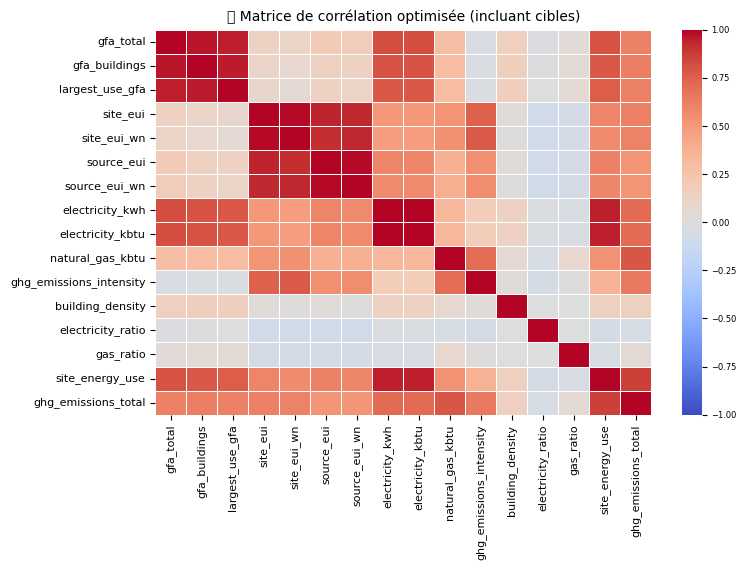

In [24]:
# 🔍 Définition du seuil de corrélation pour la suppression des variables redondantes
threshold = 0.75

# 📊 Détection des types de variables
numerical_columns = df_final.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df_final.select_dtypes(include=['object', 'category']).columns.tolist()

# 📌 Détection des variables binaires (ayant exactement 2 valeurs distinctes)
binary_columns = [col for col in numerical_columns if df_final[col].nunique() == 2]

# ✅ Exclure les variables binaires et les variables cibles pour la détection de multicolinéarité
target_vars = ["site_energy_use", "ghg_emissions_total"]
continuous_columns = [col for col in numerical_columns if col not in binary_columns and col not in target_vars]

# 🏢 Création d'une copie propre pour éviter de modifier `df_final`
df_reduced = df_final.copy()

# 📊 Calcul de la matrice de corrélation incluant les cibles
correlation_matrix = df_reduced[continuous_columns + target_vars].corr()

# 🎯 Sélection des variables ayant une forte corrélation avec les cibles
correlation_with_targets = correlation_matrix[target_vars].drop(index=target_vars)  # Retirer les cibles elles-mêmes

# 📌 Identifier les variables ayant une corrélation significative avec AU MOINS UNE cible
strong_correlation_with_targets = correlation_with_targets[
    (correlation_with_targets.abs() > 0.3).any(axis=1)
].index.tolist()

logger.info(f"📊 Variables ayant une forte corrélation avec une cible : {strong_correlation_with_targets}")

# 🏷️ Sélection des paires de variables ayant une corrélation absolue > seuil (hors cibles)
corr_matrix_continuous = correlation_matrix.loc[continuous_columns, continuous_columns]  # Exclure les cibles ici

# 🛠 Correction du problème en appliquant le masque de la bonne taille
upper_triangle = corr_matrix_continuous.where(
    np.triu(np.ones(corr_matrix_continuous.shape), k=1).astype(bool)
)

# 📌 Liste des variables hautement corrélées entre elles (hors cibles)
highly_correlated_vars = [
    column for column in upper_triangle.columns 
    if any(abs(upper_triangle[column]) > threshold)
]

# ❗ Suppression des variables redondantes SEULEMENT si elles ne sont PAS corrélées aux cibles
variables_to_remove = [var for var in highly_correlated_vars if var not in strong_correlation_with_targets]

# 🔥 Suppression des variables redondantes identifiées
df_reduced.drop(columns=variables_to_remove, inplace=True)

# 📌 Mise à jour des variables continues après suppression
remaining_continuous_vars = [col for col in continuous_columns if col in df_reduced.columns]

# ✅ Exclure les variables binaires des variables continues restantes
remaining_continuous_vars = [col for col in remaining_continuous_vars if col not in binary_columns]

# 📊 Affichage du récapitulatif
logger.info("=" * 80)
logger.info(f"✅ Variables supprimées pour éviter la multicolinéarité : {sorted(variables_to_remove)}")
logger.info("-" * 40)
logger.info("📊 Variables continues restantes après suppression :")
for col in sorted(remaining_continuous_vars):
    logger.info(f"🔹 {col}")
logger.info("=" * 80)

# 📏 📊 **Affichage de la matrice de corrélation réduite**
plt.figure(figsize=(8, 5))  # Taille du graphique optimisée
ax = sns.heatmap(
    df_reduced[remaining_continuous_vars + target_vars].corr(),
    annot=False,
    cmap="coolwarm",
    linewidths=0.5,
    vmin=-1, vmax=1,
    cbar=True  # Activation de la barre de couleur
)

# 🎨 Ajustement des labels
plt.xticks(fontsize=8, rotation=90)  # Rotation et réduction de la taille des labels X
plt.yticks(fontsize=8)  # Réduction de la taille des labels Y
plt.title("🔍 Matrice de corrélation optimisée (incluant cibles)", fontsize=10)

# 🎨 Ajustement de la colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=6)  # Taille réduite des ticks de la colorbar

plt.show()



### **📌 Code 2 : Analyse des corrélations entre les variables continues**
- **Objectif** : Identifier les **variables très corrélées entre elles** et supprimer les **redondantes** pour éviter la multicolinéarité.
- **Actions :**
  1. Calcul de la **matrice de corrélation entre les variables continues uniquement** (excluant les cibles et variables binaires).
  2. Sélection des **variables ayant une corrélation absolue > 0.85**.
  3. Suppression des **variables redondantes**.
  4. Affichage d'une **matrice de corrélation réduite** (sans les cibles cette fois).
  5. Vérification des variables restantes.

✅ **Ce code sert à éviter des problèmes de multicolinéarité dans les modèles.**

2025-02-07 16:05:04.071 | INFO     | __main__:<module>:40 - ================================================================================
2025-02-07 16:05:04.072 | INFO     | __main__:<module>:41 - ✅ Variables supprimées pour éviter la multicolinéarité : ['co2_intensity_per_floor', 'electricity_kbtu', 'electricity_kwh', 'energy_intensity_per_floor', 'gfa_buildings', 'ghg_emissions_intensity', 'largest_use_gfa', 'site_eui_wn', 'source_eui', 'source_eui_wn']
2025-02-07 16:05:04.073 | INFO     | __main__:<module>:42 - ----------------------------------------
2025-02-07 16:05:04.073 | INFO     | __main__:<module>:43 - 📊 Variables continues restantes après suppression :
2025-02-07 16:05:04.074 | INFO     | __main__:<module>:45 - 🔹 building_density
2025-02-07 16:05:04.075 | INFO     | __main__:<module>:45 - 🔹 electricity_ratio
2025-02-07 16:05:04.075 | INFO     | __main__:<module>:45 - 🔹 gas_ratio
2025-02-07 16:05:04.076 | INFO     | __main__:<module>:45 - 🔹 gfa_total
2025-02-07 16:05:04.

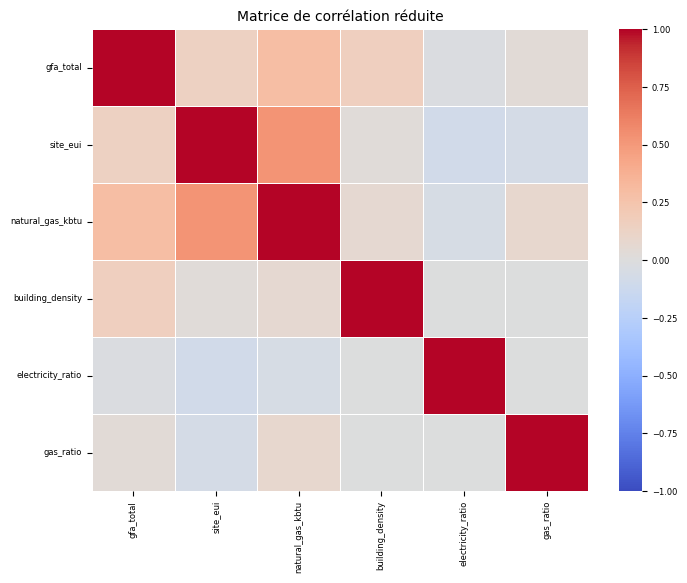

In [25]:
# 🔍 Définition du seuil de corrélation pour la suppression des variables redondantes
threshold = 0.75

# 📊 Détection des types de variables
numerical_columns = df_final.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df_final.select_dtypes(include=['object', 'category']).columns.tolist()

# 📌 Détection des variables binaires (avec seulement 2 valeurs distinctes)
binary_columns = [col for col in numerical_columns if df_final[col].nunique() == 2]

# ✅ Exclure les variables binaires et les variables cibles
target_vars = ["site_energy_use", "ghg_emissions_total"]
continuous_columns = [col for col in numerical_columns if col not in binary_columns and col not in target_vars]

# 🏢 Création d'une copie propre pour éviter de modifier `df_final`
df_reduced = df_final.copy()

# 📊 Calcul de la matrice de corrélation pour les variables continues uniquement
correlation_matrix = df_reduced[continuous_columns].corr()

# 🏷️ Sélectionner les paires de variables ayant une corrélation absolue > seuil
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# 📌 Liste des variables hautement corrélées à supprimer
highly_correlated_vars = [
    column for column in upper_triangle.columns 
    if any(abs(upper_triangle[column]) > threshold)
]

# 🔥 Suppression des variables redondantes
df_reduced.drop(columns=highly_correlated_vars, inplace=True)

# 📌 Mise à jour des variables continues après suppression
remaining_continuous_vars = [col for col in continuous_columns if col in df_reduced.columns]

# ✅ Exclure les variables binaires des variables continues restantes
remaining_continuous_vars = [col for col in remaining_continuous_vars if col not in binary_columns]

# 📊 Affichage du récapitulatif
logger.info("=" * 80)
logger.info(f"✅ Variables supprimées pour éviter la multicolinéarité : {sorted(highly_correlated_vars)}")
logger.info("-" * 40)
logger.info("📊 Variables continues restantes après suppression :")
for col in sorted(remaining_continuous_vars):
    logger.info(f"🔹 {col}")
logger.info("=" * 80)

# 📏 📊 **Affichage de la matrice de corrélation réduite**
plt.figure(figsize=(8, 6))  # Taille du graphique optimisée
ax = sns.heatmap(
    df_reduced[remaining_continuous_vars].corr(),
    annot=False,
    cmap="coolwarm",
    linewidths=0.5,
    vmin=-1, vmax=1,
    cbar=True  # Activation de la barre de couleur
)

# 🎨 Ajustement des labels
plt.xticks(fontsize=6, rotation=90)  # Rotation et réduction de la taille des labels X
plt.yticks(fontsize=6)  # Réduction de la taille des labels Y
plt.title("Matrice de corrélation réduite", fontsize=10)  # Ajout d'un titre plus clair

# 🎨 Ajustement de la colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=6)  # Taille réduite des ticks de la colorbar

plt.show()


In [26]:
# 📊 Aperçu statistique des variables continues restantes
logger.info("=" * 80)
logger.info("📊 Analyse des valeurs des variables continues")
logger.info("=" * 80)
logger.info(f"\n{df_reduced[remaining_continuous_vars].describe()}")

# 📌 Détection des variables contenant des valeurs négatives
negative_values = {col: (df_reduced[col] < 0).sum() for col in remaining_continuous_vars if (df_reduced[col] < 0).sum() > 0}

if negative_values:
    logger.warning("⚠️ Variables contenant des valeurs négatives :")
    for col, count in negative_values.items():
        logger.warning(f"🔹 `{col}` : {count} valeurs négatives détectées.")
else:
    logger.info("✅ Aucune valeur négative détectée dans les variables continues.")



2025-02-07 16:05:04.190 | INFO     | __main__:<module>:2 - ================================================================================
2025-02-07 16:05:04.192 | INFO     | __main__:<module>:3 - 📊 Analyse des valeurs des variables continues
2025-02-07 16:05:04.193 | INFO     | __main__:<module>:4 - ================================================================================
2025-02-07 16:05:04.200 | INFO     | __main__:<module>:5 - 
         gfa_total      site_eui  natural_gas_kbtu  building_density  electricity_ratio     gas_ratio
count  1668.000000  1.668000e+03      1.668000e+03      1.668000e+03       1.668000e+03  1.668000e+03
mean      0.000000  5.963788e-17      1.107561e-16      1.555182e+09       6.977274e+09  7.037816e+09
std       1.000300  1.000300e+00      1.000300e+00      1.744580e+10       1.128440e+11  1.546354e+11
min      -1.022439 -1.506711e+00     -8.051276e-01      2.582117e+03      -3.367616e-01  0.000000e+00
25%      -0.748631 -6.960715e-01     -8.05127

2025-02-07 16:05:04.218 | INFO     | __main__:<module>:8 - ================================================================================
2025-02-07 16:05:04.219 | INFO     | __main__:<module>:9 - 📊 Analyse des valeurs des variables continues
2025-02-07 16:05:04.220 | INFO     | __main__:<module>:10 - ================================================================================
2025-02-07 16:05:04.225 | INFO     | __main__:<module>:11 - 
       site_energy_use  ghg_emissions_total
count      1668.000000         1.668000e+03
mean          0.000000        -1.363152e-16
std           1.000300         1.000300e+00
min          -0.975974        -9.344382e-01
25%          -0.728075        -7.367929e-01
50%          -0.461728        -4.566947e-01
75%           0.413924         4.231908e-01
max           2.126924         2.163166e+00
2025-02-07 16:05:04.226 | WARNING  | __main__:<module>:17 - ⚠️ Variables contenant des valeurs négatives :
2025-02-07 16:05:04.227 | WARNING  | __main__:<mod

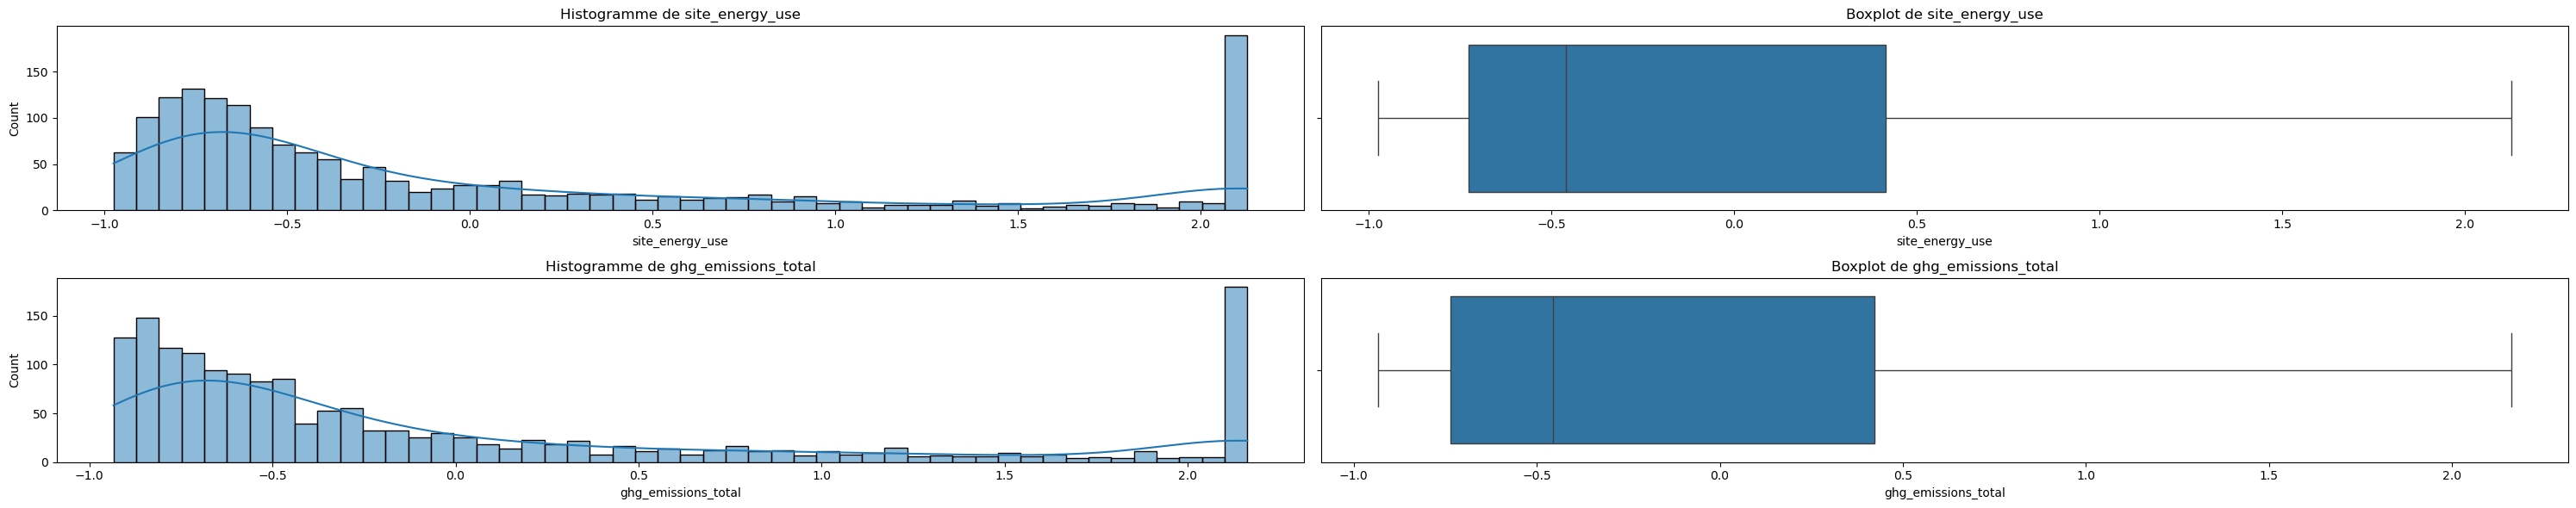

In [27]:
# Liste des variables cibles
target_vars = ["site_energy_use", "ghg_emissions_total"]

# Vérification de l'existence des colonnes dans df_final
if all(var in df_final.columns for var in target_vars):
    
    # 📊 Aperçu statistique des variables continues restantes
    logger.info("=" * 80)
    logger.info("📊 Analyse des valeurs des variables continues")
    logger.info("=" * 80)
    logger.info(f"\n{df_reduced[target_vars].describe()}")

    # 📌 Détection des variables contenant des valeurs négatives
    negative_values = {col: (df_reduced[col] < 0).sum() for col in target_vars if (df_reduced[col] < 0).sum() > 0}

    if negative_values:
        logger.warning("⚠️ Variables contenant des valeurs négatives :")
        for col, count in negative_values.items():
            logger.warning(f"🔹 `{col}` : {count} valeurs négatives détectées.")
    else:
        logger.info("✅ Aucune valeur négative détectée dans les variables continues.")


    # 📊 Visualisation des distributions
    fig, axes = plt.subplots(2, 2, figsize=(30, 6))

    for i, var in enumerate(target_vars):
        # Histogramme
        sns.histplot(df_final[var], bins=50, kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f"Histogramme de {var}")

        # Boxplot
        sns.boxplot(x=df_final[var], ax=axes[i, 1])
        axes[i, 1].set_title(f"Boxplot de {var}")


    plt.tight_layout()
    plt.show()
else:
    print("Les variables cibles ne sont pas présentes dans df_final.")




### **✅ 1. Vérification des variables binaires et catégorielles encodées**
On veut s’assurer que :  
- Les variables binaires sont bien encodées en `0` et `1`.  
- Les variables catégorielles sont bien transformées en variables numériques (One-Hot, Ordinal, ou autre encodage). 

In [28]:
# Récupérer toutes les variables numériques
numerical_columns = df_reduced.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Identifier les variables binaires en excluant celles issues d'un One-Hot Encoding
binary_columns = [
    col for col in numerical_columns 
    if df_reduced[col].nunique() == 2 and not col.startswith("property_") and not col.startswith("largest_use_type_") and not col.startswith("neighborhood_")
]

# Identifier les variables catégorielles encodées en One-Hot
one_hot_encoded_columns = [
    col for col in numerical_columns 
    if df_reduced[col].nunique() == 2 and (col.startswith("property_") or col.startswith("largest_use_type_") or col.startswith("neighborhood_"))
]

logger.info("=" * 80)
logger.info("📊 Vérification des variables binaires")
for col in binary_columns:
    unique_values = df_reduced[col].unique()
    logger.info(f"🔹 {col} : {unique_values}")

logger.info("-" * 40)

logger.info("📊 Vérification des variables catégorielles encodées (One-Hot Encoding)")
for col in one_hot_encoded_columns:
    unique_values = df_reduced[col].unique()
    logger.info(f"🔹 {col} : {unique_values}")

logger.info("=" * 80)


2025-02-07 16:05:04.591 | INFO     | __main__:<module>:16 - ================================================================================
2025-02-07 16:05:04.593 | INFO     | __main__:<module>:17 - 📊 Vérification des variables binaires
2025-02-07 16:05:04.595 | INFO     | __main__:<module>:20 - 🔹 building_type : [0 1]
2025-02-07 16:05:04.597 | INFO     | __main__:<module>:20 - 🔹 compliance_status : [0 1]
2025-02-07 16:05:04.598 | INFO     | __main__:<module>:22 - ----------------------------------------
2025-02-07 16:05:04.599 | INFO     | __main__:<module>:24 - 📊 Vérification des variables catégorielles encodées (One-Hot Encoding)
2025-02-07 16:05:04.600 | INFO     | __main__:<module>:27 - 🔹 property_type_education : [0 1]
2025-02-07 16:05:04.601 | INFO     | __main__:<module>:27 - 🔹 property_type_office : [0 1]
2025-02-07 16:05:04.602 | INFO     | __main__:<module>:27 - 🔹 property_type_other : [1 0]
2025-02-07 16:05:04.603 | INFO     | __main__:<module>:27 - 🔹 property_type_storag

2025-02-07 16:05:04.629 | INFO     | __main__:<module>:1 - ================================================================================
2025-02-07 16:05:04.630 | INFO     | __main__:<module>:2 - 📊 Vérification des variables catégorielles non encodées
2025-02-07 16:05:04.631 | INFO     | __main__:<module>:3 - ================================================================================
2025-02-07 16:05:04.632 | INFO     | __main__:<module>:9 - 📌 Variables catégorielles détectées : ['council_district', 'year_built_cat', 'floors_cat']
2025-02-07 16:05:04.634 | INFO     | __main__:<module>:18 - 🔹 `council_district` - 7 catégories uniques
2025-02-07 16:05:04.635 | INFO     | __main__:<module>:19 - council_district
7    31.714628
2    23.800959
3    12.170264
4    10.371703
5     7.913669
1     7.134293
6     6.894484
Name: proportion, dtype: float64
2025-02-07 16:05:04.637 | INFO     | __main__:<module>:18 - 🔹 `year_built_cat` - 5 catégories uniques
2025-02-07 16:05:04.639 | INFO    

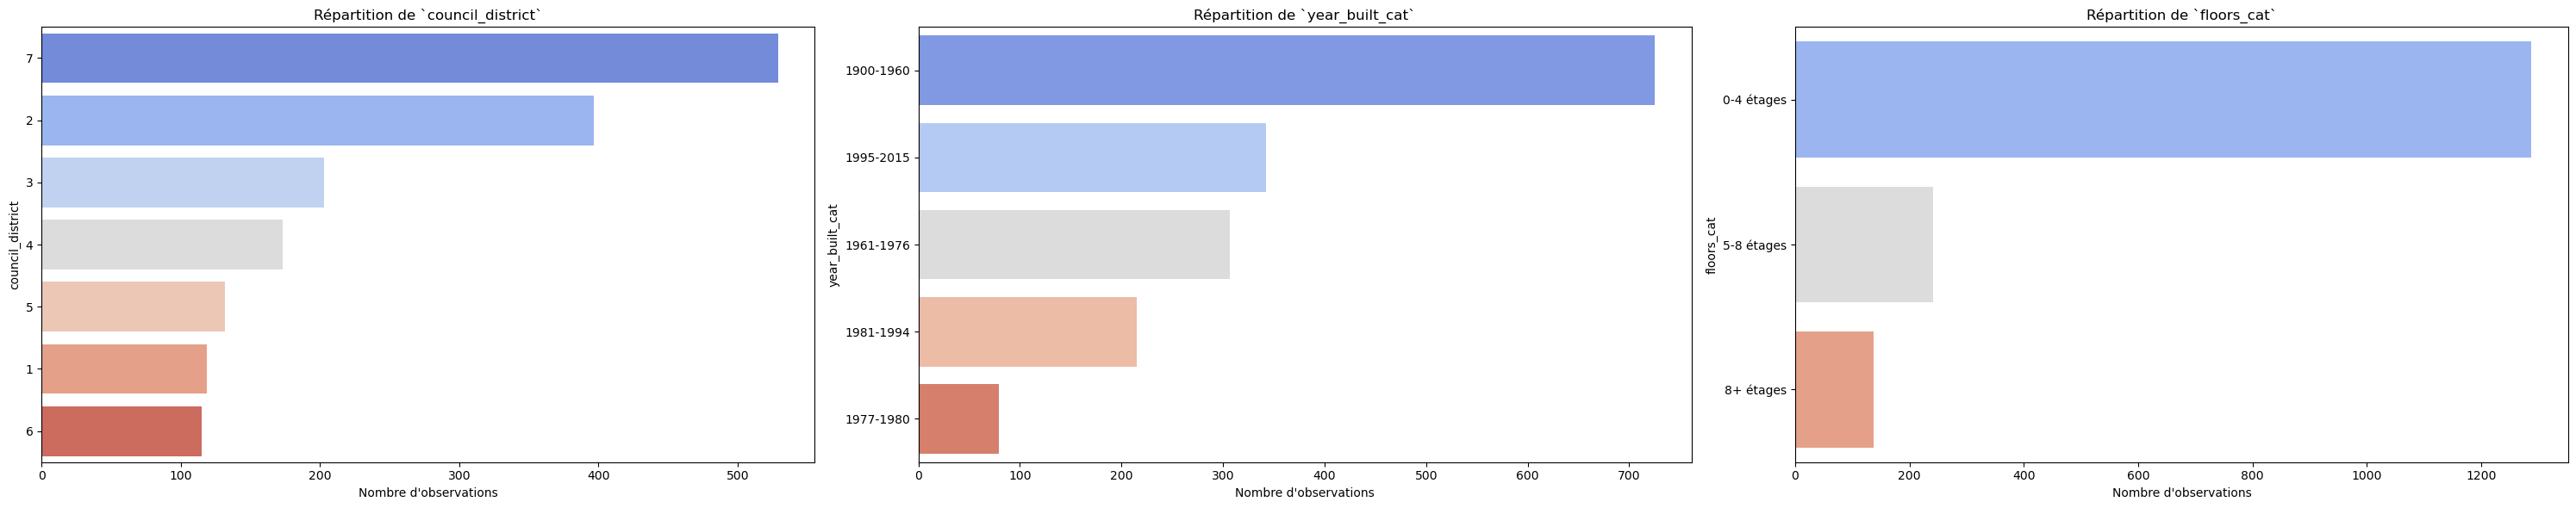

2025-02-07 16:05:04.901 | INFO     | __main__:<module>:56 - ================================================================================


In [29]:
logger.info("=" * 80)
logger.info("📊 Vérification des variables catégorielles non encodées")
logger.info("=" * 80)

# 📊 Détection des variables catégorielles restantes
categorical_columns = df_reduced.select_dtypes(include=['object', 'category']).columns.tolist()

if categorical_columns:
    logger.info(f"📌 Variables catégorielles détectées : {categorical_columns}")
    
    missing_values_detected = False  # Flag pour suivre si des valeurs manquantes sont trouvées

    for col in categorical_columns:
        missing_count = df_reduced[col].isna().sum()  # Nombre de valeurs manquantes
        value_counts = df_reduced[col].value_counts(normalize=True) * 100  # Distribution en pourcentage
        num_categories = len(value_counts)

        logger.info(f"🔹 `{col}` - {num_categories} catégories uniques")
        logger.info(f"{value_counts.head(10)}")  # Afficher les 10 catégories les plus fréquentes

        # 📌 Vérification des valeurs manquantes
        if missing_count > 0:
            logger.warning(f"⚠️ `{col}` contient {missing_count} valeurs manquantes.")
            missing_values_detected = True

        # 📌 Vérification des variables à forte cardinalité
        if num_categories > 10:
            logger.warning(f"⚠️ `{col}` contient un grand nombre de catégories ({num_categories}). Regroupement potentiellement nécessaire.")

        # 📌 Vérification des catégories rares
        if value_counts.min() < 1:
            logger.warning(f"⚠️ `{col}` contient des catégories très rares (<1% des observations). Fusion recommandée.")

    if not missing_values_detected:
        logger.info("✅ Aucune valeur manquante détectée dans les variables catégorielles.")

    # 📊 Visualisation des distributions
    num_plots = len(categorical_columns)
    num_cols = 2
    num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

    fig, axes = plt.subplots(1, 3 , figsize=(30, 3 * num_rows))

    for ax, col in zip(axes.flatten(), categorical_columns):
        sns.countplot(y=df_reduced[col], order=df_reduced[col].value_counts().index, palette="coolwarm", ax=ax)
        ax.set_title(f"Répartition de `{col}`")
        ax.set_xlabel("Nombre d'observations")
        ax.set_ylabel(col)

    plt.tight_layout()
    plt.show()

else:
    logger.info("✅ Toutes les variables catégorielles ont bien été encodées.")

logger.info("=" * 80)


In [30]:
logger.info("=" * 80)
logger.info("🚀 Encodage des variables catégorielles")
logger.info("=" * 80)

df_encoded = df_reduced.copy()

# ====================================================================================
# 🎯 Encodage One-Hot de `council_district`
# ====================================================================================
df_encoded = pd.get_dummies(df_encoded, columns=["council_district"], prefix="district")

# 📌 Conversion des nouvelles colonnes en `int64` pour harmoniser avec les autres binaires
district_columns = [col for col in df_encoded.columns if "district_" in col]
df_encoded[district_columns] = df_encoded[district_columns].astype(int)
logger.info("✅ Encodage One-Hot appliqué sur `council_district` (converti en `int64`).")

# ====================================================================================
# 🎯 Encodage Ordinal de `year_built_cat`
# ====================================================================================
year_built_mapping = {
    "1900-1960": 1,
    "1961-1976": 2,
    "1977-1980": 3,
    "1981-1994": 4,
    "1995-2015": 5
}
df_encoded["year_built_cat"] = df_encoded["year_built_cat"].map(year_built_mapping).astype(int)
logger.info("✅ Encodage Ordinal appliqué sur `year_built_cat`.")

# ====================================================================================
# 🎯 Encodage Ordinal de `floors_cat`
# ====================================================================================
floors_mapping = {
    "0-4 étages": 1,
    "5-8 étages": 2,
    "8+ étages": 3
}
df_encoded["floors_cat"] = df_encoded["floors_cat"].map(floors_mapping).astype(int)
logger.info("✅ Encodage Ordinal appliqué sur `floors_cat`.")

# ====================================================================================
# 🔍 Vérification finale après encodage
# ====================================================================================
logger.info("=" * 80)
logger.info("📊 Vérification des variables encodées après transformation")
logger.info("=" * 80)

# Affichage des stats après encodage
encoded_vars = ["year_built_cat", "floors_cat"] + district_columns
logger.info(f"📌 Distribution après encodage :\n{df_encoded[encoded_vars].describe()}")
logger.info("=" * 80)

# Vérification des valeurs uniques après encodage
for col in encoded_vars:
    unique_values = df_encoded[col].unique()
    logger.info(f"🔹 `{col}` - Valeurs uniques : {unique_values}")

logger.info("✅ Encodage des variables catégorielles terminé avec succès.")
logger.info("=" * 80)


2025-02-07 16:05:04.914 | INFO     | __main__:<module>:1 - ================================================================================
2025-02-07 16:05:04.915 | INFO     | __main__:<module>:2 - 🚀 Encodage des variables catégorielles
2025-02-07 16:05:04.916 | INFO     | __main__:<module>:3 - ================================================================================
2025-02-07 16:05:04.920 | INFO     | __main__:<module>:15 - ✅ Encodage One-Hot appliqué sur `council_district` (converti en `int64`).
2025-02-07 16:05:04.921 | INFO     | __main__:<module>:28 - ✅ Encodage Ordinal appliqué sur `year_built_cat`.
2025-02-07 16:05:04.923 | INFO     | __main__:<module>:39 - ✅ Encodage Ordinal appliqué sur `floors_cat`.
2025-02-07 16:05:04.924 | INFO     | __main__:<module>:44 - ================================================================================
2025-02-07 16:05:04.924 | INFO     | __main__:<module>:45 - 📊 Vérification des variables encodées après transformation
2025-02-07 1

### **🚀 Détection complète du Data Leakage**
Nous allons :
1. **Analyser la corrélation entre toutes les variables et les cibles** (`site_energy_use`, `ghg_emissions_total`).
2. **Vérifier les variables binaires et catégorielles** pour s’assurer qu’elles ne contiennent pas d’infos directes sur les cibles.
3. **Identifier et supprimer les variables à risque**.

 **📊 Vérification des corrélations de toutes les variables**
On calcule la **corrélation de toutes les variables** (numériques, binaires, catégoriques encodées) avec les cibles.

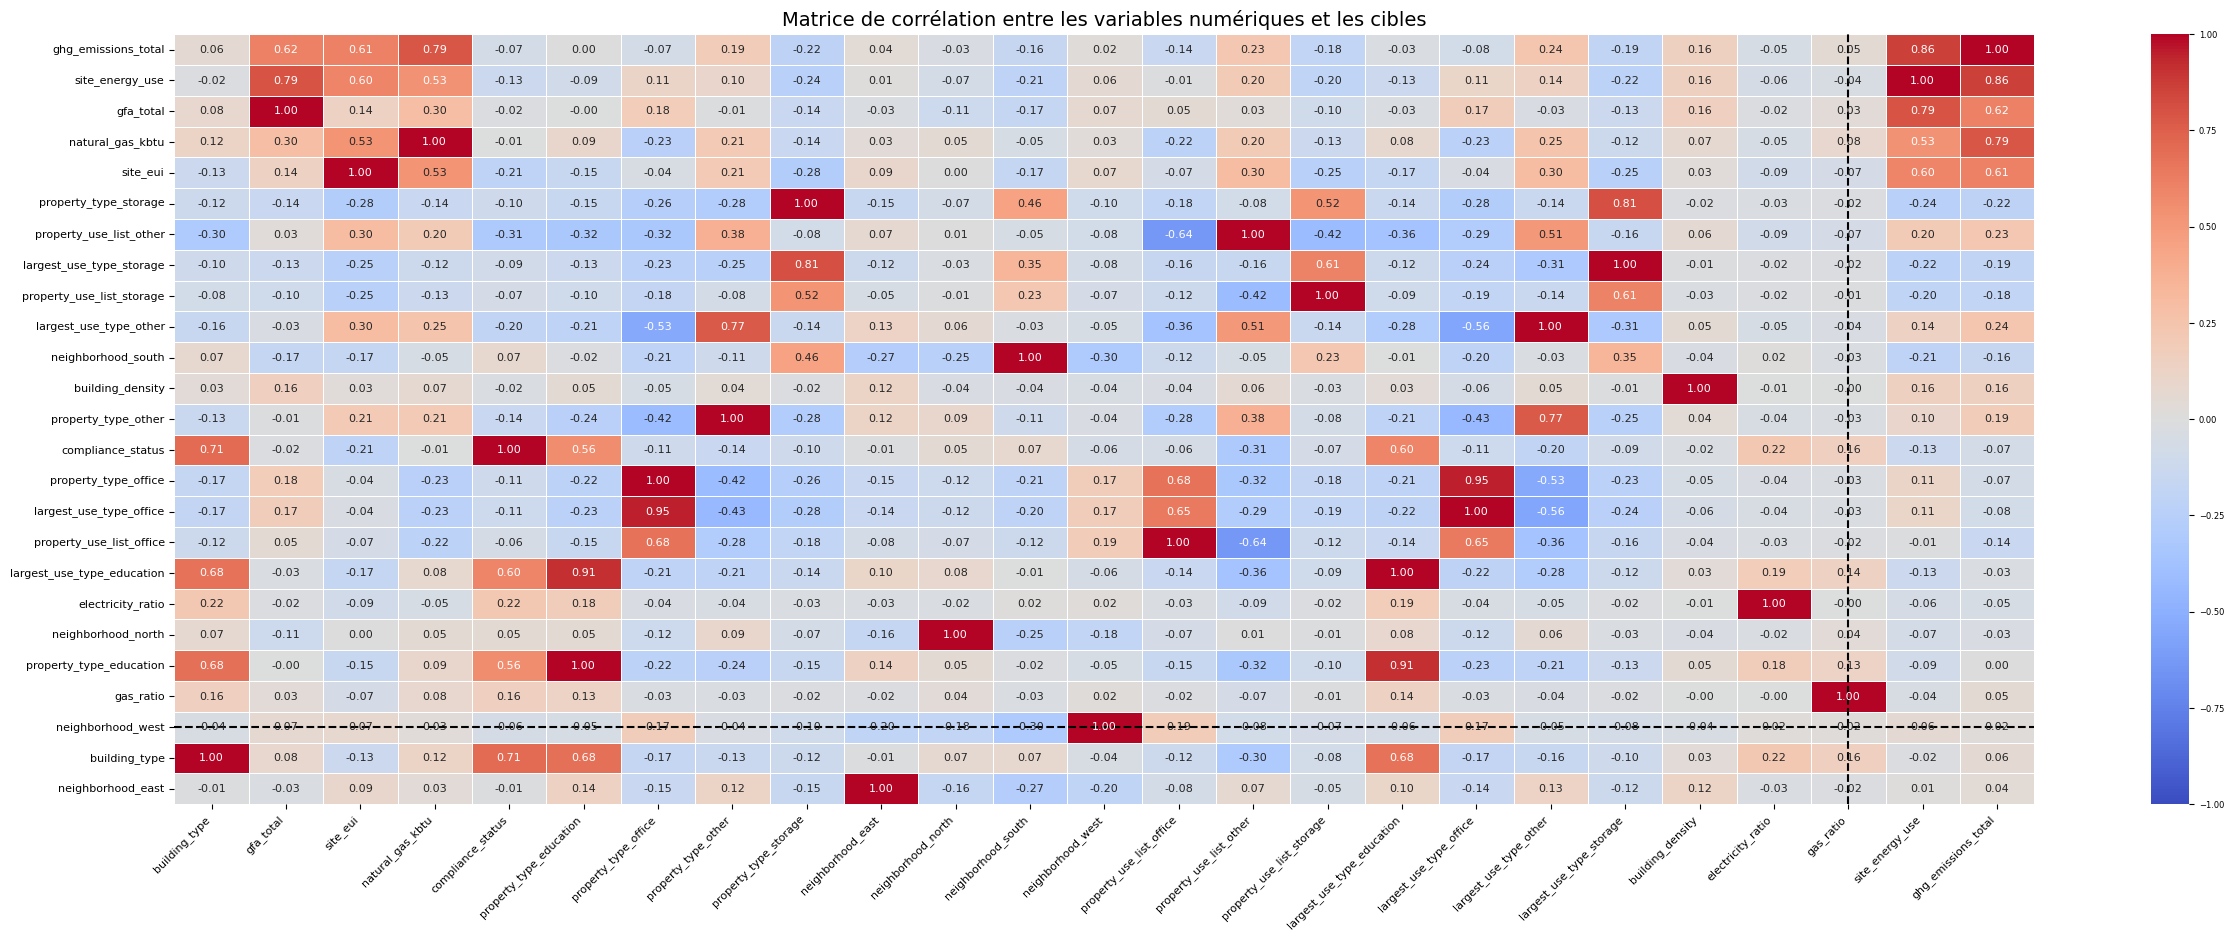

In [31]:
# 📊 Sélection des variables numériques (hors cibles)
numerical_vars = [col for col in df_encoded.select_dtypes(include=['int64', 'float64']).columns if col not in ["site_energy_use", "ghg_emissions_total"]]

# Matrice de corrélation triée par corrélation avec la cible
correlation_matrix = df_encoded[numerical_vars + ["site_energy_use", "ghg_emissions_total"]].corr()
correlation_with_targets = correlation_matrix[["site_energy_use", "ghg_emissions_total"]].abs().sum(axis=1)
correlation_matrix = correlation_matrix.loc[correlation_with_targets.sort_values(ascending=False).index]

# 📊 Affichage amélioré de la Heatmap
plt.figure(figsize=(30, 10))
ax = sns.heatmap(
    correlation_matrix, 
    annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1, 
    annot_kws={"size": 8}  # Taille des annotations plus lisible
)

# 📌 Ajout de lignes verticales pour séparer les cibles
ax.axvline(x=len(numerical_vars)-0.5, color="black", linestyle="--", linewidth=1.5)
ax.axhline(y=len(numerical_vars)-0.5, color="black", linestyle="--", linewidth=1.5)

# 📌 Rotation et alignement des labels
plt.xticks(fontsize=8, rotation=45, ha='right')
plt.yticks(fontsize=8)

# 🎨 Ajustement de la colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=6)  # Taille réduite des ticks de la colorbar
plt.title("Matrice de corrélation entre les variables numériques et les cibles", fontsize=14)
plt.show()

 


In [32]:
# ====================================================================================
# 🚀 Détection et suppression des variables fortement corrélées avec la cible
# ====================================================================================
logger.info("=" * 80)
logger.info("🔍 Détection des variables à exclure pour éviter le Data Leakage")
logger.info("=" * 80)

# 🎯 Variables cibles
target_vars = ["site_energy_use", "ghg_emissions_total"]

# 📌 Matrice de corrélation
correlation_matrix = df_encoded.corr()

# 📌 Étape 1 : Identifier les variables fortement corrélées avec la cible (|corr| > 0.75)
high_corr_with_target = {}

for target in target_vars:
    correlated_features = correlation_matrix[target].abs()
    excluded_features = correlated_features[correlated_features > 0.75].index.tolist()
    excluded_features.remove(target)  # Ne pas exclure la cible elle-même
    high_corr_with_target[target] = excluded_features

    if excluded_features:
        logger.info(f"📌 Variables fortement corrélées avec `{target}` (>0.75) : {excluded_features}")
    else:
        logger.info(f"✅ Aucune variable fortement corrélée avec `{target}`")

# 📌 Étape 2 : Identifier les paires de variables explicatives avec |corr| > 0.75
high_corr_pairs = []
expl_vars = [col for col in df_encoded.columns if col not in target_vars]

for i, col1 in enumerate(expl_vars):
    for col2 in expl_vars[i + 1:]:
        if abs(correlation_matrix.loc[col1, col2]) > 0.75:
            high_corr_pairs.append((col1, col2, correlation_matrix.loc[col1, col2]))

if high_corr_pairs:
    logger.info("📌 Paires de variables explicatives avec |corr| > 0.75 :")
    for col1, col2, corr_value in high_corr_pairs:
        logger.info(f"   🔹 `{col1}` et `{col2}` - Corrélation : {corr_value:.2f}")
else:
    logger.info("✅ Aucune paire de variables explicatives avec une corrélation > 0.75")

# 📌 Étape 3 : Générer la liste des variables à exclure en s'assurant de ne PAS supprimer les cibles
excluded_vars = set()

for target, vars in high_corr_with_target.items():
    excluded_vars.update(vars)

for col1, col2, _ in high_corr_pairs:
    if col1 not in excluded_vars:
        excluded_vars.add(col2)  # On garde col1 et on exclut col2

# 📌 Vérification : Ne jamais exclure les cibles
excluded_vars = [var for var in excluded_vars if var not in target_vars]

logger.info("=" * 80)
if excluded_vars:
    logger.info(f"🗑️ Variables à exclure du dataset pour éviter le Data Leakage : {sorted(excluded_vars)}")
else:
    logger.info("✅ Aucune variable ne nécessite d'être exclue.")
logger.info("=" * 80)

# 🚀 Suppression des variables identifiées
variables_present = [col for col in excluded_vars if col in df_encoded.columns]
if variables_present:
    df_encoded.drop(columns=variables_present, inplace=True)
    logger.info(f"✅ Variables supprimées pour éviter le data leakage : {variables_present}")
else:
    logger.info("✅ Aucune variable problématique détectée, aucune suppression effectuée.")

# 🎯 Vérification finale : s'assurer que les cibles sont encore dans le dataset
logger.info("=" * 80)
logger.info("📊 Vérification finale des variables après suppression des variables à risque")
logger.info(f"📌 Nombre total de variables restantes : {df_encoded.shape[1]}")
logger.info(f"📌 Liste des variables restantes :")
for col in sorted(df_encoded.columns):
    logger.info(f"🔹 {col}")

for target in target_vars:
    if target not in df_encoded.columns:
        logger.warning(f"⚠️ ERREUR : La variable cible `{target}` a été supprimée ! Vérification nécessaire.")
    else:
        logger.info(f"✅ La variable cible `{target}` est bien présente.")

logger.info("=" * 80)


2025-02-07 16:05:05.737 | INFO     | __main__:<module>:4 - ================================================================================
2025-02-07 16:05:05.738 | INFO     | __main__:<module>:5 - 🔍 Détection des variables à exclure pour éviter le Data Leakage
2025-02-07 16:05:05.739 | INFO     | __main__:<module>:6 - ================================================================================
2025-02-07 16:05:05.744 | INFO     | __main__:<module>:24 - 📌 Variables fortement corrélées avec `site_energy_use` (>0.75) : ['gfa_total', 'ghg_emissions_total']
2025-02-07 16:05:05.745 | INFO     | __main__:<module>:24 - 📌 Variables fortement corrélées avec `ghg_emissions_total` (>0.75) : ['site_energy_use', 'natural_gas_kbtu']
2025-02-07 16:05:05.750 | INFO     | __main__:<module>:38 - 📌 Paires de variables explicatives avec |corr| > 0.75 :
2025-02-07 16:05:05.751 | INFO     | __main__:<module>:40 -    🔹 `gfa_total` et `f_is_large_building` - Corrélation : 0.90
2025-02-07 16:05:05.752 | I

In [33]:
logger.info("=" * 80)
# 📂 Définition du chemin de sauvegarde
processed_dir = directories["processed_dir"]["absolute"]

# 📌 Enregistrement en CSV
csv_path = os.path.join(processed_dir, "dataset_cleaned.csv")
df_encoded.to_csv(csv_path, index=False)
logger.info(f"✅ Dataset sauvegardé en CSV : {(directories['processed_dir']['relative'] / 'dataset_cleaned.csv')}")

logger.info("=" * 80)
logger.info("🎯 Enregistrement du dataset terminé !")
logger.info("=" * 80)


2025-02-07 16:05:05.796 | INFO     | __main__:<module>:1 - ================================================================================
2025-02-07 16:05:05.825 | INFO     | __main__:<module>:8 - ✅ Dataset sauvegardé en CSV : data\processed\dataset_cleaned.csv
2025-02-07 16:05:05.827 | INFO     | __main__:<module>:10 - ================================================================================
2025-02-07 16:05:05.830 | INFO     | __main__:<module>:11 - 🎯 Enregistrement du dataset terminé !
2025-02-07 16:05:05.831 | INFO     | __main__:<module>:12 - ================================================================================


In [34]:
def generate_numerical_analysis_report(df, directories, target_vars, output_filename="analyse_numerique.html"):
    """
    Génère un rapport HTML d'analyse des variables numériques, catégorielles et binaires du dataset.

    Paramètres :
    - df : DataFrame contenant les données.
    - directories : Dictionnaire contenant les chemins de sortie.
    - target_vars : Liste des variables cibles à analyser.
    - output_filename : Nom du fichier HTML en sortie.
    """
    # 🔄 Réinitialisation complète des figures pour éviter les conflits
    plt.close('all')

    # 🔍 Définition du chemin de sortie
    output_path = directories["outputs_dir"]["absolute"]

    # ✅ Vérification des variables cibles existantes
    target_vars = [var for var in target_vars if var in df.columns]
    if not target_vars:
        raise ValueError("❌ Aucune variable cible valide trouvée dans le DataFrame.")

    # 📊 Détection des types de variables
    numerical_columns = df.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
    binary_columns = [col for col in numerical_columns if df[col].nunique() == 2]
    numerical_columns = [col for col in numerical_columns if col not in binary_columns and col not in target_vars]

    # ✅ Vérification des variables exclues de l'analyse
    all_columns = set(df.columns)
    analyzed_columns = set(numerical_columns) | set(binary_columns) | set(categorical_columns) | set(target_vars)
    missing_columns = all_columns - analyzed_columns

    if missing_columns:
        logger.warning(f"⚠️ Certaines variables ne sont pas prises en compte dans l'analyse : {missing_columns}")
    else:
        logger.info("✅ Toutes les variables sont bien analysées.")


    # ✅ Logs des types de colonnes détectées
    logger.info("=" * 60)
    logger.info("🔍 Début de l'analyse des variables.")
    logger.info("=" * 60)
    logger.info(f"🎯 Variables cibles détectées : {target_vars}")
    logger.info(f"📊 Variables numériques détectées : {numerical_columns}")
    logger.info(f"🔢 Variables binaires détectées : {binary_columns}")
    logger.info(f"📖 Variables catégorielles détectées : {categorical_columns}")
    logger.info("-" * 60)

    # ✅ Conversion des variables binaires en entiers (évite les erreurs Matplotlib)
    if binary_columns:
        df[binary_columns] = df[binary_columns].fillna(0).astype(int)

    # Mapping des titres plus explicites
    title_mapping = {
        "site_energy_use": "🔋 Consommation énergétique du site",
        "ghg_emissions_total": "🌍 Émissions totales de CO2",
        "year_built": "🏗 Année de construction",
        "num_buildings": "🏢 Nombre de bâtiments",
        "num_floors": "📊 Nombre d'étages",
        "gfa_total": "📏 Surface totale (sqft)",
        "gfa_parking": "🚗 Surface du parking (sqft)",
        "gfa_buildings": "🏠 Surface des bâtiments (sqft)",
        "largest_use_gfa": "🏢 Surface du plus grand usage",
        "site_eui": "⚡ Intensité de l'utilisation de l'énergie (EUI)",
        "site_eui_wn": "🌤 EUI normalisé par la météo",
        "source_eui": "🔌 Source EUI",
        "source_eui_wn": "⛅ Source EUI normalisé",
        "steam_use": "💨 Consommation de vapeur (kBtu)",
        "electricity_kbtu": "⚡ Consommation électrique (kBtu)",
        "natural_gas_kbtu": "🔥 Consommation de gaz naturel (kBtu)",
        "ghg_emissions_intensity": "🌱 Intensité des émissions de CO2",
        "property_use_list" : "🏠 Liste des usages du bâtiment" ,
        "largest_use_type" : "🏢 Type d'usage principal"
    }
    # 🎨 HTML pour structurer le rapport
    html_content = """
<html>
<head>
    <title>Analyse des Variables Numériques</title>
    <style>
        /* 🌟 Styles généraux */
        body { font-family: Arial, sans-serif; background-color: #f8f9fa; margin: 20px; font-size: 12px; color: #333; }
        .container { max-width: 1100px; margin: auto; padding: 20px; background: white; box-shadow: 0px 0px 10px rgba(0,0,0,0.1); border-radius: 8px; }

        /* 🎯 Titres */
        h1 { text-align: center; font-size: 20px; color: #007BFF; margin-bottom: 14px; }
        h2 { font-size: 16px; color: #333; border-bottom: 2px solid #007BFF; padding-bottom: 5px; margin-top: 25px; text-align: center; }
        h3 { font-size: 16px; color: #555; margin-top: 15px; text-align: center; }
        .target { color: #DC3545; font-weight: bold; }

        /* 📊 Grille d'affichage */
        .grid { display: flex; flex-wrap: wrap; gap: 12px; justify-content: center; text-align: center; }
        .image { width: 30%; }
        img { width: 100%; height: auto; border-radius: 5px; box-shadow: 2px 2px 8px rgba(0,0,0,0.1); }

        /* 📋 Tableaux */
        table { width: 70%; margin: center; border-collapse: collapse; font-size: 10px; background-color: white; }
        th, td { border: 1px solid #ddd; padding: 6px; text-align: center; font-size: 9px;}
        th { background-color: #007BFF; color: white; }
        tbody tr:nth-child(odd) { background-color: #f2f2f2; }
    </style>
</head>
<body>
    <div class='container'>
        <h1>📊 Analyse des Variables Numériques</h1>


    """

    # 🎯 Analyse des variables cibles
    if target_vars:
        html_content += "<h2 class='target'>🎯 Analyse des Variables Cibles</h2>"
        for feature in target_vars:
            logger.info(f"📌 Analyse en cours pour la variable cible : {feature}")
            data = df[feature].replace([np.inf, -np.inf], np.nan).dropna()
            
            hist_path = os.path.join(output_path, f"{feature}_histogram.png").replace("\\", "/")
            box_path = os.path.join(output_path, f"{feature}_boxplot.png").replace("\\", "/")

            plt.figure(figsize=(6, 5))
            sns.histplot(data, bins=30, kde=True, color='blue')
            plt.savefig(hist_path)
            plt.close()
            logger.info(f"📈 Histogramme créé pour {feature}.")
            # Vérification de l'existence du fichier
            if os.path.exists(hist_path):
                logger.info(f"✅ Histogramme enregistré")
            else:
                logger.error(f"❌ Erreur : Histogramme manquant")


            plt.figure(figsize=(6, 5))
            sns.boxplot(y=data, color='red')
            plt.savefig(box_path)
            plt.close()
            logger.info(f"📊 Boxplot créé pour {feature}.")
            # Vérification de l'existence du fichier
            if os.path.exists(box_path):
                logger.info(f"✅ Boxplot enregistré")
            else:
                logger.error(f"❌ Erreur : Boxplot manquant")


            stats_html = data.describe().to_frame().to_html()

            html_content += f"""
            <h2>{title_mapping.get(feature, feature)}</h2>
            <div class='grid'>
                <div class='image'><img src='{hist_path}'></div>
                <div class='image'><img src='{box_path}'></div>
                <div class='image'>{stats_html}</div>
            </div>
            """

    # 📌 Analyse des variables explicatives numériques
    if numerical_columns:
        html_content += "<h2>📌 Analyse des Variables Explicatives Numériques</h2>"
        for feature in numerical_columns:
            logger.info(f"📌 Analyse en cours pour la colonne numérique : {feature}")
            data = df[feature].replace([np.inf, -np.inf], np.nan).dropna()
            
            hist_path = os.path.join(output_path, f"{feature}_histogram.png").replace("\\", "/")
            box_path = os.path.join(output_path, f"{feature}_boxplot.png").replace("\\", "/")

            plt.figure(figsize=(6, 5))
            sns.histplot(data, bins=30, kde=True, color='blue')
            plt.savefig(hist_path)
            plt.close()
            logger.info(f"📈 Histogramme créé pour {feature}.")
            # Vérification de l'existence du fichier
            if os.path.exists(hist_path):
                logger.info(f"✅ Histogramme enregistré")
            else:
                logger.error(f"❌ Erreur : Histogramme manquant")


            plt.figure(figsize=(6, 5))
            sns.boxplot(y=data, color='red')
            plt.savefig(box_path)
            plt.close()
            logger.info(f"📊 Boxplot créé pour {feature}.")
            # Vérification de l'existence du fichier
            if os.path.exists(box_path):
                logger.info(f"✅ Boxplot enregistré")
            else:
                logger.error(f"❌ Erreur : Boxplot manquant")


            stats_html = data.describe().to_frame().to_html()

            html_content += f"""
            <h2>{title_mapping.get(feature, feature)}</h2>
            <div class='grid'>
                <div class='image'><img src='{hist_path}'></div>
                <div class='image'><img src='{box_path}'></div>
                <div class='image'>{stats_html}</div>
            </div>
            """

    # 📌 Analyse des variables catégorielles
    if categorical_columns:
        html_content += "<h2>📖 Analyse des Variables Catégorielles</h2>"
        for feature in categorical_columns:
            logger.info(f"📌 Analyse en cours pour la variable catégorielle : {feature}")
            value_counts = df[feature].value_counts()

            bar_path = os.path.join(output_path, f"{feature}_barplot.png").replace("\\", "/")

            plt.figure(figsize=(4, 3))
            sns.barplot(x=value_counts.values, y=value_counts.index, palette="Blues_r")
            plt.xlabel("Nombre d'occurrences")
            plt.ylabel("Catégories")
            plt.title(f"Répartition de {feature}")
            plt.savefig(bar_path, bbox_inches='tight')
            plt.close()
            # Vérification de l'existence du fichier
            if os.path.exists(hist_path):
                logger.info(f"✅ Histogramme enregistré")
            else:
                logger.error(f"❌ Erreur : Histogramme manquant")

            # 🛠 Ajout du nom de colonne pour plus de clarté
            stats_html = value_counts.to_frame().rename(columns={feature: 'Nombre d’occurrences'}).reset_index()
            stats_html.rename(columns={"index": feature}, inplace=True)
            stats_html = stats_html.to_html(index=False)

            html_content += f"""
            <h2>{title_mapping.get(feature, feature)}</h2>
            <div class='grid'>
                <div class='image'><img src='{bar_path}'></div>
                <div class='image'>{stats_html}</div>
            </div>
            """

    # 📌 Analyse des variables binaires
    if binary_columns:
        html_content += "<h2>🔢 Analyse des Variables Binaires</h2>"
        for feature in binary_columns:
            logger.info(f"📌 Analyse en cours pour la variable binaire : {feature}")
            value_counts = df[feature].value_counts()

            bar_path = os.path.join(output_path, f"{feature}_barplot.png").replace("\\", "/")

            plt.figure(figsize=(4, 3))
            sns.barplot(x=value_counts.index, y=value_counts.values, palette="coolwarm")
            plt.xlabel("Valeur")
            plt.ylabel("Nombre d'occurrences")
            plt.title(f"Distribution de {feature}")
            plt.savefig(bar_path, bbox_inches='tight')
            plt.close()
            # Vérification de l'existence du fichier
            if os.path.exists(hist_path):
                logger.info(f"✅ Histogramme enregistré")
            else:
                logger.error(f"❌ Erreur : Histogramme manquant")

            # 🛠 Ajout du nom de colonne pour plus de clarté
            stats_html = value_counts.to_frame().rename(columns={feature: 'Nombre d’occurrences'}).reset_index()
            stats_html.rename(columns={"index": feature}, inplace=True)
            stats_html = stats_html.to_html(index=False)

            html_content += f"""
            <h2>{title_mapping.get(feature, feature)}</h2>
            <div class='grid'>
                <div class='image'><img src='{bar_path}'></div>
                <div class='image'>{stats_html}</div>
            </div>
            """

    # ✅ Fermeture du fichier HTML
    html_content += "</div></body></html>"

    # 📂 Sauvegarde du fichier HTML
    html_path = os.path.join(output_path, output_filename)
    with open(html_path, "w", encoding="utf-8") as f:
        f.write(html_content)

    logger.info("=" * 60)
    logger.info(f"✅ Rapport HTML généré avec succès : {output_filename}")
    logger.info("🎯 Fin de l'analyse.")
    logger.info("=" * 60)

In [35]:
generate_numerical_analysis_report(
    df=df_encoded,  # Ton DataFrame contenant les données
    directories=directories,  # Dictionnaire contenant les chemins de sortie
    target_vars=["site_energy_use", "ghg_emissions_total"],  # Liste des variables cibles
    output_filename="rapport_analyse.html"  # Nom du fichier de sortie
)

2025-02-07 16:05:05.883 | INFO     | __main__:generate_numerical_analysis_report:36 - ✅ Toutes les variables sont bien analysées.
2025-02-07 16:05:05.884 | INFO     | __main__:generate_numerical_analysis_report:40 - ============================================================
2025-02-07 16:05:05.885 | INFO     | __main__:generate_numerical_analysis_report:41 - 🔍 Début de l'analyse des variables.
2025-02-07 16:05:05.885 | INFO     | __main__:generate_numerical_analysis_report:42 - ============================================================
2025-02-07 16:05:05.886 | INFO     | __main__:generate_numerical_analysis_report:43 - 🎯 Variables cibles détectées : ['site_energy_use', 'ghg_emissions_total']
2025-02-07 16:05:05.886 | INFO     | __main__:generate_numerical_analysis_report:44 - 📊 Variables numériques détectées : ['site_eui', 'building_density', 'electricity_ratio', 'gas_ratio', 'year_built_cat', 'floors_cat']
2025-02-07 16:05:05.887 | INFO     | __main__:generate_numerical_analysis_